In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from brian2 import *
from brian2 import implementation
from IPython.display import HTML  # Add this line
import ipywidgets as widgets
from ipywidgets import interact
from scipy.signal import find_peaks
from scipy.signal import correlate
import scipy

INFO       Cache size for target 'cython': 5781307378 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/home/awilson/.cython/brian_extensions' directory. [brian2]


In [2]:
# Define distance-dependent delay function

# @implementation('cpp')
# @check_units(source=1, target=1, result=1)
# def distance_dependent_delay(source_x, source_y, target_x, target_y):
#     d = sqrt((source_x - target_x)**2 + (source_y - taget_y)**2)
#     return d

# Calculate distances between neurons in group 1 and group 2
def calc_distances(pre_x, pre_y, post_x, post_y):
    distances = []
    for i in range(len(pre_x)):
        for j in range(len(post_x)):
            distance = np.sqrt((pre_x[i] - post_x[j])**2 + (pre_y[i] - post_y[j])**2)
            distances.append(distance)
    # Reshape the distances array into a matrix
    distances_matrix = np.array(distances).reshape(len(pre_x), len(post_x))
    flattened_dm = distances_matrix.flatten()
    return flattened_dm


In [3]:
# number of neurons per side for each type
N_D = 163 #165
N_A = 97 #78
N_C = 271 # 269
N_M = 248

# positions
din_l_pos = [504.5, 515.0, 525.5, 534.5, 545.0, 554.0, 564.5, 573.5, 584.0, 594.5, 603.5, 614.0, 624.5, 633.5, \
             644.0, 653.0, 663.5, 672.5, 683.0, 693.5, 704.0, 714.5, 725.0, 737.0, 747.5, 758.0, 770.0, 780.5, \
             791.0, 803.0, 813.5, 824.0, 836.0, 846.5, 857.0, 869.0, 879.5, 890.0, 902.0, 912.5, 923.0, 935.0, \
             945.5, 956.0, 968.0, 978.5, 989.0, 1001.0, 1013.0, 1026.5, 1038.5, 1050.5, 1062.5, 1076.0, 1088.0, \
             1100.0, 1112.0, 1125.5, 1137.5, 1149.5, 1161.5, 1175.0, 1187.0, 1199.0, 1211.0, 1224.5, 1236.5, \
             1248.5, 1260.5, 1274.0, 1286.0, 1298.0, 1310.0, 1323.5, 1335.5, 1347.5, 1359.5, 1373.0, 1385.0, \
             1398.5, 1412.0, 1427.0, 1440.5, 1454.0, 1469.0, 1482.5, 1497.5, 1511.0, 1526.0, 1539.5, 1553.0, \
             1568.0, 1581.5, 1596.5, 1610.0, 1625.0, 1638.5, 1652.0, 1667.0, 1680.5, 1697.0, 1713.5, 1730.0, \
             1746.5, 1763.0, 1779.5, 1796.0, 1812.5, 1829.0, 1845.5, 1862.0, 1878.5, 1895.0, 1911.5, 1928.0, \
             1944.5, 1961.0, 1977.5, 1995.5, 2015.0, 2034.5, 2054.0, 2073.5, 2094.5, 2114.0, 2133.5, 2153.0, \
             2172.5, 2193.5, 2213.0, 2232.5, 2252.0, 2271.5, 2294.0, 2319.5, 2343.5, 2369.0, 2393.0, 2418.5, \
             2442.5, 2468.0, 2492.0, 2517.5, 2541.5, 2567.0, 2595.5, 2628.5, 2661.5, 2694.5, 2727.5, 2760.5, \
             2793.5, 2826.5, 2859.5, 2901.5, 2951.0, 3000.5, 3050.0, 3099.5, 3149.0, 3222.5, 3321.5, 3420.5]

din_r_pos = [504.5, 515.0, 525.5, 534.5, 545.0, 554.0, 564.5, 573.5, 584.0, 594.5, 603.5, 614.0, 624.5, 633.5, \
             644.0, 653.0, 663.5, 672.5, 683.0, 693.5, 705.5, 716.0, 726.5, 738.5, 749.0, 759.5, 771.5, 782.0, \
             792.5, 804.5, 813.5, 824.0, 836.0, 846.5, 857.0, 869.0, 879.5, 891.5, 902.0, 912.5, 923.0, 935.0, \
             947.0, 956.0, 968.0, 978.5, 989.0, 1001.0, 1013.0, 1026.5, 1038.5, 1050.5, 1062.5, 1076.0, 1088.0, \
             1100.0, 1112.0, 1125.5, 1137.5, 1149.5, 1161.5, 1175.0, 1187.0, 1199.0, 1211.0, 1224.5, 1236.5, \
             1248.5, 1260.5, 1274.0, 1286.0, 1298.0, 1310.0, 1323.5, 1335.5, 1347.5, 1359.5, 1373.0, 1385.0, \
             1398.5, 1412.0, 1427.0, 1440.5, 1454.0, 1469.0, 1482.5, 1497.5, 1511.0, 1526.0, 1539.5, 1553.0, \
             1568.0, 1581.5, 1596.5, 1610.0, 1625.0, 1638.5, 1652.0, 1667.0, 1680.5, 1697.0, 1713.5, 1730.0, \
             1746.5, 1763.0, 1779.5, 1796.0, 1812.5, 1829.0, 1845.5, 1862.0, 1878.5, 1895.0, 1911.5, 1928.0, \
             1944.5, 1961.0, 1977.5, 1995.5, 2015.0, 2036.0, 2054.0, 2073.5, 2094.5, 2114.0, 2135.0, 2153.0, \
             2172.5, 2193.5, 2213.0, 2234.0, 2252.0, 2271.5, 2294.0, 2319.5, 2343.5, 2369.0, 2393.0, 2418.5, \
             2442.5, 2468.0, 2492.0, 2517.5, 2541.5, 2567.0, 2597.0, 2630.0, 2663.0, 2696.0, 2729.0, 2762.0, \
             2795.0, 2828.0, 2861.0, 2901.5, 2951.0, 3000.5, 3050.0, 3099.5, 3149.0, 3224.0, 3321.5, 3420.5]

cin_l_pos = [506.0, 516.5, 527.0, 536.0, 546.5, 555.5, 566.0, 575.0, 585.5, 596.0, 605.0, 612.5, 621.5, 630.5, \
             639.5, 648.5, 657.5, 666.5, 675.5, 684.5, 695.0, 702.5, 710.0, 719.0, 726.5, 735.5, 743.0, 752.0, \
             759.5, 768.5, 776.0, 785.0, 792.5, 801.5, 809.0, 816.5, 825.5, 831.5, 839.0, 848.0, 854.0, 861.5, \
             870.5, 876.5, 884.0, 891.5, 899.0, 906.5, 914.0, 921.5, 927.5, 936.5, 942.5, 948.5, 957.5, 963.5, \
             971.0, 977.0, 984.5, 992.0, 998.0, 1005.5, 1014.5, 1020.5, 1028.0, 1034.0, 1041.5, 1047.5, 1055.0, \
             1064.0, 1070.0, 1077.5, 1083.5, 1091.0, 1097.0, 1104.5, 1113.5, 1119.5, 1127.0, 1133.0, 1140.5, \
             1146.5, 1154.0, 1163.0, 1169.0, 1176.5, 1182.5, 1190.0, 1196.0, 1203.5, 1209.5, 1215.5, 1223.0, \
             1229.0, 1238.0, 1242.5, 1250.0, 1256.0, 1262.0, 1269.5, 1275.5, 1281.5, 1289.0, 1295.0, 1302.5, \
             1308.5, 1314.5, 1322.0, 1328.0, 1337.0, 1341.5, 1349.0, 1355.0, 1361.0, 1368.5, 1374.5, 1380.5, \
             1388.0, 1394.0, 1401.5, 1409.0, 1416.5, 1422.5, 1430.0, 1437.5, 1443.5, 1451.0, 1458.5, 1466.0, \
             1472.0, 1479.5, 1487.0, 1493.0, 1500.5, 1508.0, 1515.5, 1521.5, 1529.0, 1536.5, 1542.5, 1550.0, \
             1557.5, 1565.0, 1571.0, 1578.5, 1586.0, 1593.5, 1601.0, 1608.5, 1616.0, 1623.5, 1631.0, 1640.0, \
             1646.0, 1653.5, 1661.0, 1668.5, 1676.0, 1683.5, 1692.5, 1700.0, 1709.0, 1716.5, 1725.5, 1733.0, \
             1742.0, 1749.5, 1758.5, 1766.0, 1775.0, 1782.5, 1791.5, 1800.5, 1809.5, 1818.5, 1827.5, 1836.5, \
             1847.0, 1854.5, 1863.5, 1872.5, 1881.5, 1890.5, 1901.0, 1913.0, 1920.5, 1931.0, 1940.0, 1950.5, \
             1959.5, 1970.0, 1980.5, 1989.5, 2000.0, 2010.5, 2019.5, 2030.0, 2039.0, 2049.5, 2058.5, 2069.0, \
             2079.5, 2090.0, 2100.5, 2111.0, 2123.0, 2135.0, 2144.0, 2156.0, 2166.5, 2177.0, 2189.0, 2201.0, \
             2214.5, 2226.5, 2238.5, 2250.5, 2264.0, 2276.0, 2288.0, 2300.0, 2313.5, 2325.5, 2337.5, 2349.5, \
             2363.0, 2375.0, 2388.5, 2402.0, 2417.0, 2430.5, 2444.0, 2459.0, 2472.5, 2489.0, 2505.5, 2522.0, \
             2538.5, 2555.0, 2571.5, 2588.0, 2604.5, 2621.0, 2637.5, 2654.0, 2670.5, 2688.5, 2708.0, 2729.0, \
             2747.0, 2766.5, 2789.0, 2814.5, 2838.5, 2864.0, 2888.0, 2913.5, 2937.5, 2963.0, 2991.5, 3024.5, \
             3057.5, 3090.5, 3123.5, 3156.5, 3198.5, 3248.0, 3297.5, 3347.0, 3422.0, 3519.5]

cin_r_pos = [503.0, 516.5, 527.0, 536.0, 546.5, 552.5, 566.0, 575.0, 585.5, 596.0, 602.0, 612.5, 621.5, 630.5, \
             639.5, 650.0, 657.5, 666.5, 675.5, 686.0, 692.0, 701.0, 708.5, 719.0, 728.0, 734.0, 743.0, 752.0, \
             762.5, 768.5, 776.0, 786.5, 795.5, 800.0, 809.0, 816.5, 825.5, 831.5, 842.0, 845.0, 851.0, 861.5, \
             870.5, 876.5, 884.0, 894.5, 899.0, 905.0, 914.0, 921.5, 927.5, 936.5, 942.5, 948.5, 954.5, 963.5, \
             971.0, 977.0, 986.0, 992.0, 998.0, 1008.5, 1014.5, 1022.0, 1028.0, 1034.0, 1041.5, 1047.5, 1055.0, \
             1061.0, 1071.5, 1077.5, 1085.0, 1091.0, 1097.0, 1107.5, 1113.5, 1121.0, 1127.0, 1133.0, 1140.5, \
             1146.5, 1154.0, 1160.0, 1170.5, 1176.5, 1184.0, 1190.0, 1196.0, 1206.5, 1209.5, 1215.5, 1220.0, \
             1229.0, 1235.0, 1241.0, 1250.0, 1256.0, 1259.0, 1269.5, 1275.5, 1284.5, 1289.0, 1295.0, 1305.5, \
             1308.5, 1314.5, 1319.0, 1328.0, 1334.0, 1340.0, 1349.0, 1355.0, 1358.0, 1368.5, 1374.5, 1383.5, \
             1388.0, 1394.0, 1400.0, 1409.0, 1416.5, 1422.5, 1433.0, 1437.5, 1443.5, 1449.5, 1458.5, 1466.0, \
             1472.0, 1481.0, 1487.0, 1493.0, 1499.0, 1508.0, 1515.5, 1521.5, 1532.0, 1536.5, 1542.5, 1548.5, \
             1557.5, 1565.0, 1571.0, 1580.0, 1586.0, 1595.0, 1604.0, 1608.5, 1616.0, 1623.5, 1631.0, 1640.0, \
             1646.0, 1655.0, 1661.0, 1670.0, 1679.0, 1685.0, 1694.0, 1703.0, 1709.0, 1716.5, 1724.0, 1733.0, \
             1742.0, 1752.5, 1758.5, 1766.0, 1778.0, 1784.0, 1793.0, 1802.0, 1811.0, 1820.0, 1826.0, 1835.0, \
             1844.0, 1856.0, 1865.0, 1871.0, 1883.0, 1892.0, 1901.0, 1913.0, 1920.5, 1931.0, 1940.0, 1950.5, \
             1959.5, 1970.0, 1982.0, 1991.0, 2000.0, 2010.5, 2019.5, 2030.0, 2039.0, 2049.5, 2058.5, 2069.0, \
             2081.0, 2090.0, 2103.5, 2111.0, 2123.0, 2136.5, 2144.0, 2156.0, 2169.5, 2177.0, 2189.0, 2202.5, \
             2214.5, 2226.5, 2238.5, 2250.5, 2262.5, 2276.0, 2289.5, 2301.5, 2313.5, 2325.5, 2337.5, 2349.5, \
             2361.5, 2376.5, 2388.5, 2402.0, 2417.0, 2433.5, 2444.0, 2459.0, 2472.5, 2489.0, 2505.5, 2522.0, \
             2538.5, 2555.0, 2571.5, 2588.0, 2604.5, 2621.0, 2637.5, 2654.0, 2672.0, 2688.5, 2708.0, 2730.5, \
             2747.0, 2766.5, 2789.0, 2814.5, 2838.5, 2864.0, 2888.0, 2913.5, 2937.5, 2963.0, 2993.0, 3023.0, \
             3059.0, 3090.5, 3125.0, 3156.5, 3200.0, 3249.5, 3299.0, 3348.5, 3422.0, 3521.0]



In [4]:
# # connectivity matrices
file_path = 'andrea_model/CNS_model_ModelDB/functional_model/conn_mat.npy'
exp_con_mat = np.load(file_path)

din_din_ll_conmat = exp_con_mat[1106:1269,1106:1269]
din_din_rr_conmat = exp_con_mat[1269:1432,1269:1432]
din_cin_ll_conmat = exp_con_mat[1106:1269,564:835]
din_cin_rr_conmat = exp_con_mat[1269:1432,835:1106]

cin_cin_rl_conmat = exp_con_mat[835:1106,564:835]
cin_cin_lr_conmat = exp_con_mat[564:835,835:1106]
cin_din_rl_conmat = exp_con_mat[835:1106,1106:1269]
cin_din_lr_conmat = exp_con_mat[564:835,1269:1432]

xin_din_ll_conmat = exp_con_mat[1986:2016,1106:1269]
xin_din_lr_conmat = exp_con_mat[1986:2016,1269:1432]
frst_nrn = np.sum(xin_din_ll_conmat[:,9])
avg_connections = np.mean(np.sum(xin_din_ll_conmat[:,:30], axis=0))
print(avg_connections)
xin_din_rr_conmat = exp_con_mat[2016:2046,1269:1432]
xin_din_rl_conmat = exp_con_mat[2016:2046,1106:1269]


1.4


In [5]:
# Function to plot spike raster
def plot_spike_raster(ax, spike_mon, positions, colour, N):
    spike_indices = spike_mon.i
    spike_positions = [positions[idx] for idx in spike_indices]
    ax.scatter(spike_mon.t, spike_mon.i, color=colour, s=2)
    ax.set_ylim([0,3550])
    ax.set_xlim([0,500])
        
        
def plot_spike_raster_tgthr(ax, time_secs, spike_times_list, positions_list, colors_list, group_labels):
    plt.figure(figsize=(10, 5))
#     for idx, (spike_times, sorted_indices, position, color, label) in enumerate(zip(spike_times_list, sorted_indices_list, positions_list, colors_list, group_labels)):
#         for idx, neuron_idx in enumerate(sorted_indices):
#             neuron_spike_indices = np.where(spike_times.i == neuron_idx)[0]
#             neuron_spikes = spike_times.t[neuron_spike_indices]/ms
#             plt.scatter(neuron_spikes/ms, position[neuron_idx], colors=color, linewidths=2)
#     prev_colors = ['orange','orange','green', 'green','red','red']
    for idx, (spike_mon, positions, colour) in enumerate(zip(spike_times_list, positions_list, colors_list)):
        spike_indices = spike_mon.i
        spike_positions = [positions[idx] for idx in spike_indices]
        plt.scatter(spike_mon.t, spike_positions, color=colour, s=2, alpha=1-(idx%2)/2)
#     plt.scatter(din_times_left, din_indices_l, color='blue', s=2)
#     plt.scatter(din_times_right, din_indices_r, color='blue', s=2, alpha=0.5)
    plt.ylim([0,3550])
    plt.xlim([0,time_secs])
    plt.show()
            

def calculate_firing_rate(spike_monitors, total_duration, window_size, step_size, colors, alphas):
    """
    Calculate firing rate over time using a sliding window.

    Parameters:
        spike_monitors (list): List of Brian2 SpikeMonitor objects containing spike times for each group.
        window_size (float): Size of the sliding window in seconds.
        step_size (float): Step size for moving the sliding window in seconds.
        colors (list): List of colors for each group.

    Returns:
        time_points (ndarray): Time points corresponding to the center of each window.
        firing_rates (ndarray): Firing rates calculated for each window for each group.
    """
    num_groups = len(spike_monitors)
    
    groups = ['Left dINs', 'Right dINs', 'Left aINs', 'Right aINs', 'Left cINs', 'Right cINs', 'Left MNs', 'Right MNs']
    
    # Initialize arrays to store firing rates and time points for each group
    firing_rates = []
    
    # Calculate number of windows
    num_windows = int((total_duration/second - window_size) / step_size) + 1
    
    time_points = np.zeros(num_windows)
    
    for i, spike_monitor in enumerate(spike_monitors):
        # Get spike times
        spike_times = spike_monitor.t / second

        # Initialize array to store firing rates for this group
        group_firing_rates = np.zeros(num_windows)

        # Calculate firing rate for each window
        for j in range(num_windows):
            window_start = j * step_size
            window_end = window_start + window_size
            window_midpoint = window_start + 0.5 * (window_end - window_start)
        
            # Calculate firing rate within window
            spikes_in_window = np.logical_and(spike_times >= window_start, spike_times < window_end)
            num_spikes_in_window = np.sum(spikes_in_window)
            firing_rate = num_spikes_in_window / window_size

            # Store firing rate for this group
            group_firing_rates[j] = firing_rate

            # Store time points for the first group
            if i == 0:
                time_points[j] = window_midpoint

        # Store firing rates for this group
        firing_rates.append(group_firing_rates)
        #print(group_firing_rates)
        # Plot firing rate for this group
        plt.plot(time_points, group_firing_rates, color=colors[i], alpha=alphas[i], label=groups[i])

    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title('Sliding Firing Rates for Different Neuron Groups')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.show()

def plot_average_firing_rate(spike_monitors, duration, colors):
    # Calculate firing rate for each spike monitor
    firing_rates = []
    groups = ['Left dINs', 'Right dINs', 'Left aINs', 'Right aINs', 'Left cINs', 'Right cINs', 'Left MNs', 'Right MNs']
    for spike_monitor in spike_monitors:
        spike_times = spike_monitor.t/second
        num_spikes = len(spike_times)
        firing_rate = num_spikes / duration
        firing_rates.append(firing_rate)

    # Plot average firing rate for each monitor as points
    num_monitors = len(spike_monitors)
    plt.scatter(range(num_monitors), firing_rates, marker='x', color=colors[:num_monitors], label='Firing Rate')
    plt.xlabel('Spike Monitor')
    plt.ylabel('Average Firing Rate (Hz)')
    plt.title('Average Firing Rate of Neuron Groups')
    plt.xticks(range(num_monitors), groups, rotation=45)
    
    plt.fill_between(range(num_monitors), 14, 19, color='lightblue', alpha=0.5, label='Physiological Firing Rate')
    plt.legend()
    plt.show()      
    
    
def calculate_phases(spike_monitor, reference_spike_times, period):
    """Calculate the phases of spikes relative to reference spikes."""
    spike_times = spike_monitor.t / ms  # Convert spike times to milliseconds
    phases = []

    for spike_time in spike_times:
        phase_diffs = (spike_time - reference_spike_times) % period
        min_phase_diff = np.min(phase_diffs)
        phases.append(min_phase_diff / period)

    return np.array(phases) * 2 * np.pi  # Convert to radians

def plot_average_phases(spikes_monitors, labels, period):
    """Plot average phases of spikes for different neuron groups."""
    # Determine the reference times from the spikes of the dINs L group
    reference_spike_times = spikes_monitors[0].t / ms

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})

    for i, spike_monitor in enumerate(spikes_monitors):
        if i == 0:
            mean_phase_rad = 0  # Set dINs L phase to zero
        else:
            phases_rad = calculate_phases(spike_monitor, reference_spike_times, period)
            mean_phase_rad = np.mean(phases_rad)
        
        arrow_color = plt.cm.tab10(i % 10)  # Use tab10 colormap for distinct colors
        ax.arrow(mean_phase_rad, 0, 0, 1, width=0.025, head_width=0.1, head_length=0.1, color=arrow_color, label=labels[i])

    # Example experimental phases
    exp_phases = [0.5, 0, 0.2, 0.075, 0.125]  # Replace with your experimental phases
    exp_labels = ['dIN right exp', 'dIN caudal exp', 'aIN exp', 'cIN exp', 'MN exp']
    phases_radians_exp = [phase * 2 * np.pi for phase in exp_phases]

    # Plot experimental phases
    for i, phase_rad in enumerate(phases_radians_exp):
        dot_color = plt.cm.tab10(i % 10)
        ax.scatter(phase_rad, 1.2, s=120, marker='X', color=dot_color, label=exp_labels[i])

    # Set the direction of 0 degrees to be at the top (12 o'clock position)
    ax.set_theta_zero_location('N')

    # Set the clockwise direction for increasing angles
    ax.set_theta_direction(-1)

    # Set the title
    ax.set_title('Average Phase of spike compared to most \n rostral left dIN spike (ms)', fontsize=15)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()
    
# Function to calculate interspike intervals for each neuron
def calculate_interspike_intervals_per_group(spike_times, N):
    ISIs_group = []
    spike_times_per_neuron = {i: [] for i in range(N)}
    for neuron_idx, spike_time in zip(spike_times.i, spike_times.t):
        spike_times_per_neuron[neuron_idx].append(spike_time/ms)
    for neuron_idx, spikes in spike_times_per_neuron.items():
        # Calculate ISIs
        if len(spikes) > 1:
            ISIs_neuron = [spikes[i+1] - spikes[i] for i in range(len(spikes)-1)]
            ISI_mean = np.mean(ISIs_neuron)
            ISIs_group.append(ISI_mean)
        else:
            ISIs_group.append(0)
    return ISIs_group

In [6]:
def spike_synchrony(spikes_monitors, populations, window_size=10):
    """Calculate synchrony measure between spikes of different neuron populations."""
    num_groups = len(spikes_monitors)
    sync_measure_left_left = []
    sync_measure_right_right = []
    sync_measure_left_right = []
    compared_groups_left_left = []
    compared_groups_right_right = []
    compared_groups_left_right = []
    
    for i in range(num_groups):
        for j in range(num_groups):
            if i != j:
                # Determine the sides of the neuron groups
                side_i = 'left' if 'L' in populations[i] else 'right'
                side_j = 'left' if 'L' in populations[j] else 'right'
                
                # Compare spike monitors i and j
                spike_monitor_i = spikes_monitors[i]
                spike_monitor_j = spikes_monitors[j]
                sync_count = 0
                for spike_time_i in spike_monitor_i.t:
                    sync_count += np.sum(np.abs(spike_time_i/ms - spike_monitor_j.t/ms) < window_size)
                max_possible_sync_count = len(spike_monitor_i.t/ms) * len(spike_monitor_j.t/ms)
                if max_possible_sync_count != 0:
                    normalized_sync = sync_count / max_possible_sync_count
                else:
                    normalized_sync = 0
                
                # Categorize the synchrony measure based on the sides
                if side_i == 'left' and side_j == 'left':
                    sync_measure_left_left.append(normalized_sync)
                    compared_groups_left_left.append((i, j))
                elif side_i == 'right' and side_j == 'right':
                    sync_measure_right_right.append(normalized_sync)
                    compared_groups_right_right.append((i, j))
                else:
                    sync_measure_left_right.append(normalized_sync)
                    compared_groups_left_right.append((i, j))
    
    return (sync_measure_left_left, compared_groups_left_left), (sync_measure_right_right, compared_groups_right_right), (sync_measure_left_right, compared_groups_left_right)

def plot_synchrony(sync_measures, compared_groups, populations, xlabel='Neuron Groups', ylabel='Synchrony Measure', title='Spike Synchrony'):
    """Plot synchrony measure."""
    plt.figure(figsize=(14, 6))
    
    colors = ['blue', 'green', 'red']
    labels = ['Left-Left', 'Right-Right', 'Left-Right']
    
    all_x_labels = []
    all_x_positions = []
    all_sync_measures = []
    all_colors = []
    
    current_position = 0
    for idx, (sync_measure, comp_groups) in enumerate(zip(sync_measures, compared_groups)):
        x_labels = [f"{populations[i]} & {populations[j]}" for i, j in comp_groups]
        x_positions = np.arange(len(sync_measure)) + current_position  # position for current group
        all_x_labels.extend(x_labels)
        all_x_positions.extend(x_positions)
        all_sync_measures.extend(sync_measure)
        all_colors.extend([colors[idx]] * len(sync_measure))
        current_position += len(sync_measure) + 1  # add space between groups
    
    plt.scatter(all_x_positions, all_sync_measures, marker='x', color=all_colors)
    plt.xticks(all_x_positions, all_x_labels, rotation=45, ha='right')
    
    for idx, label in enumerate(labels):
        plt.scatter([], [], color=colors[idx], label=label)  # add legend entries
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Function to plot spike raster
def plot_spike_raster(ax, spike_mon, positions, colour, N):
    spike_indices = spike_mon.i
    spike_positions = [positions[idx] for idx in spike_indices]
    ax.scatter(spike_mon.t, spike_mon.i, color=colour, s=2)
    ax.set_ylim([0,3550])
    ax.set_xlim([0,500])
    

In [79]:
def plot_phase_diagrams(state_monitor, neuron_indices=None):
    """
    Plots phase diagrams of v against w for specified neurons.
    
    Parameters:
    state_monitor (StateMonitor): The StateMonitor recording the neuron states.
    neuron_indices (list or array, optional): Indices of the neurons to plot. If None, plot all neurons.
    """
    if neuron_indices is None:
        neuron_indices = range(len(state_monitor.v))

    for idx in neuron_indices:
        plt.figure()
        plt.plot(state_monitor.v[idx]/mV, state_monitor.w[idx]/pA, label=f'Neuron {idx}')
        plt.xlabel('Membrane potential (mV)')
        plt.ylabel('Adaptation variable w (pA)')
        plt.title(f'Phase Diagram for Neuron {idx}')
        plt.legend()
        plt.show()

In [136]:
def update_plot(w_d_d, w_d_c, w_c_d, w_c_c):
    start_scope()

    N_D = 163
    N_C = 271

    tadpole_length = 100

    # new sbi params
    din_cm = 4 * pF 
    din_g_L = 3.68 * nS 
    din_E_L = -51 * mV 
    din_V_T = -28 * mV 
    din_slope_f = 23.4338 * mV 
    din_a = 4.9859 * nS 
    din_tau_w = 48.2453 * ms 
    din_b = 102.9523 * pA 
    din_V_reset = -45.8445 * mV
    
    cin_cm = 4 * pF
    cin_g_L = 1.35 * nS
    cin_E_L = -54 *mV
    cin_V_T = -29 * mV
    cin_slope_f = 12.8 * mV
    cin_a = 0.62 * nS
    cin_tau_w = 58.6 * ms
    cin_b = 21.6 * pA
    cin_V_reset = -38.8 * mV

    w_din_din = w_d_d #NMDA
    w_din_cin = w_d_c
    w_cin_din = w_c_d 
    w_cin_cin = w_c_c

    tau_exc_ampa_all = 3*ms
    tau_exc_nmda_all = 80*ms

    E_ex = 0 * mV
    E_in = -75 * mV

    v_spike_threshold = 0 * mV
    gap_conductance = 0.2*nS
    distance_threshold = 100
    
    # noise - same parameters as in van Rossum paper
    
    # Define parameters
    tau_ou = 2*ms
    sigma_ou = 10*pA #70*pA
    mu_ou = 10*pA #55*pA 

    parameters = {'general': {'tau_exc_ampa':tau_exc_ampa_all, 'tau_exc_nmda':tau_exc_nmda_all, 'tau_inh':4*ms, 'E_exc':E_ex, 'E_inh':E_in, 'v_sp':v_spike_threshold},
                'dins left': {'N': N_D, 'b':din_b, 'a':din_a, 'tau_w':din_tau_w, 'slope_f':din_slope_f, 'vr':din_V_reset, 'c_m':din_cm, 'e_l':din_E_L, \
                        'v_t': din_V_T, 'g_l': din_g_L, 'w_din_din':w_d_d*nsiemens, 'w_din_cin':w_d_c*nsiemens, 'v_initial':din_E_L },
                'dins right': {'N': N_D, 'b':din_b, 'a':din_a, 'tau_w':din_tau_w, 'slope_f':din_slope_f, 'vr':din_V_reset, 'c_m':din_cm, 'e_l':din_E_L, \
                        'v_t': din_V_T, 'g_l': din_g_L, 'w_din_din':w_d_d*nsiemens, 'w_din_cin':w_d_c*nsiemens, 'v_initial':din_E_L}, 
                'cins left': {'N': N_C, 'b':cin_b, 'a':cin_a, 'tau_w':cin_tau_w, 'slope_f':cin_slope_f, 'vr':cin_V_reset, 'c_m':cin_cm, 'e_l': cin_E_L, \
                    'v_t': cin_V_T, 'g_l': cin_g_L, 'w_cin_din':w_c_d*nsiemens, 'w_cin_cin':w_c_c*nsiemens, 'v_initial':cin_E_L}, 
                'cins right': {'N': N_C, 'b':cin_b, 'a':cin_a, 'tau_w':cin_tau_w, 'slope_f':cin_slope_f, 'vr':cin_V_reset, 'c_m':cin_cm, 'e_l': cin_E_L, \
                     'v_t': cin_V_T, 'g_l': cin_g_L, 'w_cin_din':w_c_d*nsiemens, 'w_cin_cin':w_c_c*nsiemens, 'v_initial':cin_E_L}, 
                }
    simulation_time = 1*second 
    stimulus_duration = 100*ms
    poisson_rate = 200*Hz


    eqs = """
    dv/dt = (g_l*(e_l-v) + g_l*slope_f*exp((v-v_t)/slope_f) - g_exc_ampa*(v-E_exc) - g_exc_nmda*(v-E_exc) - g_inh*(v-E_inh) + i_stim + i_ou + I_gap - w)/c_m : volt
    dw/dt = (a*(v - e_l) - w)/tau_w : amp
    dg_exc_ampa/dt = -g_exc_ampa/tau_exc_ampa : siemens 
    dg_exc_nmda/dt = -g_exc_nmda/tau_exc_nmda : siemens
    dg_inh/dt = -g_inh/tau_inh : siemens 
    di_ou/dt = (mu_ou - i_ou)/tau_ou + sigma_ou/sqrt(tau_ou)*xi: amp (unless refractory)
    I_gap : amp
    i_stim : amp
    x : 1 (constant)
    y : 1 (constant)
    """

    din_left_params = parameters['general'].copy()
    din_left_params.update(parameters['dins left'])
    din_right_params = parameters['general'].copy()
    din_right_params.update(parameters['dins right'])
    cin_left_params = parameters['general'].copy()
    cin_left_params.update(parameters['cins left'])
    cin_right_params = parameters['general'].copy()
    cin_right_params.update(parameters['cins right'])

    # Define neuron groups
    dins_left = NeuronGroup(N_D, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=din_left_params)
    dins_right = NeuronGroup(N_D, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=din_right_params)
    cins_left = NeuronGroup(N_C, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=cin_left_params)
    cins_right = NeuronGroup(N_C, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=cin_right_params)
    
    dins_left.v = parameters['dins left']['e_l']
    dins_right.v = parameters['dins right']['e_l']
    cins_left.v = parameters['cins left']['e_l']
    cins_right.v = parameters['cins right']['e_l']

    dins_left.w = 0
    dins_right.w = 0
    cins_left.w = 0
    cins_right.w = 0

    din_x_l = 0
    din_x_r = 6
    cin_x_l = 2
    cin_x_r = 8

    dins_left.x = 0  # X position
    dins_left.y = din_l_pos  # Y position

    dins_right.x = 6  # X position
    dins_right.y = din_r_pos  # Y position
    
    cins_left.x = 2  # X position
    cins_left.y = cin_l_pos  # Y position

    cins_right.x = 8  # X position
    cins_right.y = cin_r_pos  # Y position

    synaptic_model = '''
                  w_syn : siemens
                  '''
    din_stim_neurons = 39
    cin_stim_neurons = 48
    
    din_stimulus_current = 120*pA
    cin_stimulus_current = 25*pA
    
    dins_left.i_stim[:din_stim_neurons] = din_stimulus_current
    dins_right.i_stim[:din_stim_neurons] = din_stimulus_current
    cins_left.i_stim[:cin_stim_neurons] = cin_stimulus_current
    cins_right.i_stim[:cin_stim_neurons] = cin_stimulus_current
    
    # Create a Poisson group with a rate of 5 Hz
    poisson_input = PoissonGroup(1, rates=5*Hz)

    noise_synapses_din_l = Synapses(poisson_input, dins_left, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
    noise_synapses_din_l.connect(p=1.0)  # Fully connect
    noise_synapses_din_l.w_syn = 1*nS  # Example synaptic weight
    
    noise_synapses_din_r = Synapses(poisson_input, dins_right, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
    noise_synapses_din_r.connect(p=1.0)  # Fully connect
    noise_synapses_din_r.w_syn = 1*nS  # Example synaptic weight
    
    noise_synapses_cin_l = Synapses(poisson_input, cins_left, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
    noise_synapses_cin_l.connect(p=1.0)  # Fully connect
    noise_synapses_cin_l.w_syn = 1*nS  # Example synaptic weight
    
    noise_synapses_cin_r = Synapses(poisson_input, cins_right, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
    noise_synapses_cin_r.connect(p=1.0)  # Fully connect
    noise_synapses_cin_r.w_syn = 1*nS  # Example synaptic weight
    
#     external_input_rate = 20*Hz
#     external_input_weight_ampa = 1.4*nsiemens
#     external_input_weight_nmda = 0.7*nsiemens


#     xin_l = PoissonGroup(30, rates=external_input_rate)
#     xin_r = PoissonGroup(30, rates=external_input_rate)

#     S_xin_din_ll_ampa = Synapses(xin_l, dins_left, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
#     S_xin_din_ll_ampa.connect()
#     S_xin_din_ll_ampa.w_syn = 20*nsiemens * xin_din_ll_conmat.flatten()
#     S_xin_din_lr_ampa = Synapses(xin_l, dins_right, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
#     S_xin_din_lr_ampa.connect()
#     S_xin_din_lr_ampa.w_syn = 20*nsiemens * xin_din_lr_conmat.flatten()
# #     S_xin_din_l_nmda = Synapses(xin_l, dins_left, model=synaptic_model, on_pre='g_exc_nmda += w_syn')
# #     S_xin_din_l_nmda.connect()
# #     S_xin_din_l_nmda.w_syn = 0*nsiemens * xin_din_ll_conmat.flatten()

#     S_xin_din_rr_ampa = Synapses(xin_r, dins_right, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
#     S_xin_din_rr_ampa.connect()
#     S_xin_din_rr_ampa.w_syn = 20*nsiemens * xin_din_rr_conmat.flatten()
#     S_xin_din_rl_ampa = Synapses(xin_r, dins_left, model=synaptic_model, on_pre='g_exc_ampa += w_syn')
#     S_xin_din_rl_ampa.connect()
#     S_xin_din_rl_ampa.w_syn = 20*nsiemens * xin_din_rl_conmat.flatten()
#     S_xin_din_r_nmda = Synapses(xin_r, dins_right, model=synaptic_model, on_pre='g_exc_nmda += w_syn')
#     S_xin_din_r_nmda.connect()
#     S_xin_din_r_nmda.w_syn = 0*nsiemens * xin_din_rr_conmat.flatten()

    # Define synapses 

    # dINs - connect to neurons within 1000microns below their position
    S_din_din_l = Synapses(dins_left, dins_left, model=synaptic_model, on_pre='g_exc_nmda+=w_syn') 
    S_din_din_l.connect()
    S_din_din_l.w_syn = parameters['dins left']['w_din_din'] * din_din_ll_conmat.flatten()

    S_din_din_r = Synapses(dins_right, dins_right, model=synaptic_model, on_pre='g_exc_nmda+=w_syn') 
    S_din_din_r.connect()
    S_din_din_r.w_syn = parameters['dins right']['w_din_din'] * din_din_rr_conmat.flatten()

    S_din_cin_l = Synapses(dins_left, cins_left, model=synaptic_model, on_pre='g_exc_ampa+=w_syn')  
    S_din_cin_l.connect()
    S_din_cin_l.w_syn = parameters['dins left']['w_din_cin'] * din_cin_ll_conmat.flatten()

    S_din_cin_r = Synapses(dins_right, cins_right, model=synaptic_model, on_pre='g_exc_ampa+=w_syn')  
    S_din_cin_r.connect()
    S_din_cin_r.w_syn = parameters['dins right']['w_din_cin'] * din_cin_rr_conmat.flatten()

    S_cin_din_lr = Synapses(cins_left, dins_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
    S_cin_din_lr.connect()
    S_cin_din_lr.w_syn = parameters['cins left']['w_cin_din'] * cin_din_lr_conmat.flatten()

    S_cin_din_rl = Synapses(cins_right, dins_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
    S_cin_din_rl.connect()
    S_cin_din_rl.w_syn = parameters['cins right']['w_cin_din'] * cin_din_rl_conmat.flatten()
    
    S_cin_cin_lr = Synapses(cins_left, cins_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
    S_cin_cin_lr.connect()
    S_cin_cin_lr.w_syn = parameters['cins left']['w_cin_cin'] * cin_cin_lr_conmat.flatten()

    S_cin_cin_rl = Synapses(cins_right, cins_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
    S_cin_cin_rl.connect()
    S_cin_cin_rl.w_syn = parameters['cins right']['w_cin_cin'] * cin_cin_rl_conmat.flatten()

    
    gap_junctions_left = Synapses(dins_left,dins_left, model='''I_gap_post = g_gap * (v_pre - v_post) : amp (summed)
                                                                g_gap : siemens''',
                                                       method='euler')
    gap_junctions_right = Synapses(dins_right,dins_right, model='''I_gap_post = g_gap * (v_pre - v_post) : amp (summed)
                                                                   g_gap : siemens''',                         
                                                          method='euler')

    gap_junctions_left.connect('abs(y_pre - y_post) < distance_threshold')
    gap_junctions_right.connect('abs(y_pre - y_post) < distance_threshold')

    gap_junctions_left.g_gap = gap_conductance
    gap_junctions_right.g_gap = gap_conductance

    mon_din_l = StateMonitor(dins_left, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh', 'w'], record=10)  # Record the membrane potential of the first dIN
    mon_din_l_end = StateMonitor(dins_left, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh', 'w'], record=N_D-1)  # Record the membrane potential of the first dIN
    mon_din_l_mid = StateMonitor(dins_left, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh', 'w'], record=int(N_D/2))
    mon_din_l_end = StateMonitor(dins_left, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh', 'w'], record=int(N_D-1))

    mon_din_r = StateMonitor(dins_right, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh'], record=10)  # Record the membrane potential of the first dIN
    mon_cin_l = StateMonitor(cins_left, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh', 'w'], record=0) 
    mon_cin_r = StateMonitor(cins_right, ['v', 'g_exc_ampa', 'g_exc_nmda', 'g_inh', 'w'], record=0) 
    
    # Define monitors
    spike_mon_dins_l = SpikeMonitor(dins_left)
    spike_mon_dins_r = SpikeMonitor(dins_right)
    spike_mon_cins_l = SpikeMonitor(cins_left)
    spike_mon_cins_r = SpikeMonitor(cins_right)

    defaultclock.dt = 0.1 * ms
    time_secs = simulation_time
    run(time_secs)

#     # Sort neurons within each group by y-coordinate
    dins_left_sorted = sorted(range(N_D), key=lambda i: din_l_pos[i])
    dins_right_sorted = sorted(range(N_D), key=lambda i: din_r_pos[i])
    
    print(spike_mon_dins_l.i)
    print(spike_mon_dins_r.i)

    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    plot_spike_raster_tgthr(ax, time_secs, [spike_mon_dins_l, spike_mon_dins_r, spike_mon_cins_l, spike_mon_cins_r], 
                            [din_l_pos, din_r_pos, cin_l_pos, cin_r_pos],
                      ['#96501e', '#96501e', '#00aadc', '#00aadc'],
                      ['dins left', 'dins right', 'cins left', 'cins right'])
    
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 16), sharex=True)
    ax[0].plot(mon_din_l.t / ms, mon_din_l.v[0]/mV, label='din left', color='blue')
    ax[1].plot(mon_din_r.t / ms, mon_din_r.v[0]/mV, label='din right', color='blue')
    ax[2].plot(mon_cin_l.t / ms, mon_cin_l.v[0]/mV, label='cin left', color='green')
    ax[3].plot(mon_cin_r.t / ms, mon_cin_r.v[0]/mV, label='cin right', color='green')
    
    plot_phase_diagrams(mon_din_l)


WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


<spikemonitor.i: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  22,  23,  25,  28,  29,  30,
        20,  21,  24,  26,  27,  31,  32,  33,  34,  35,  36,  37,  38,
        49,  10,  42,  43,  44,   0,   1,  28,  35,  50,  52,  61,  63,
        14,  36,  38,  45,  59,  65,  70,  73,  74,  77,  78,  33,  39,
        51,  53,  58,  76,  22,  75,  79,  88,  12,  26,  80,  48,  95,
       100,  85,  72, 101, 120,  98, 105, 130, 106,  92,  97, 128, 111,
       119,  27,  13, 125, 134, 113, 138, 104, 131, 136, 126, 129,  24,
        25, 127, 133,  20, 102, 123, 145, 153, 140, 158, 117, 159, 103,
       141, 144,  93, 115, 146, 157,  15, 150,   7, 142,  87,  18, 156,
        31, 149, 155, 160,  55, 135,  64, 151,  37,  16,  68, 161,  19,
       110,  54,  82,  57, 112, 118,   2,   5,  67,  90,  91,   4, 122,
       116, 162,  23,   9,   6,  83,  71,   3,  29,  32,  11,  26,   8,
        34,  17,  30,  21,  22,  13,  24,   0, 

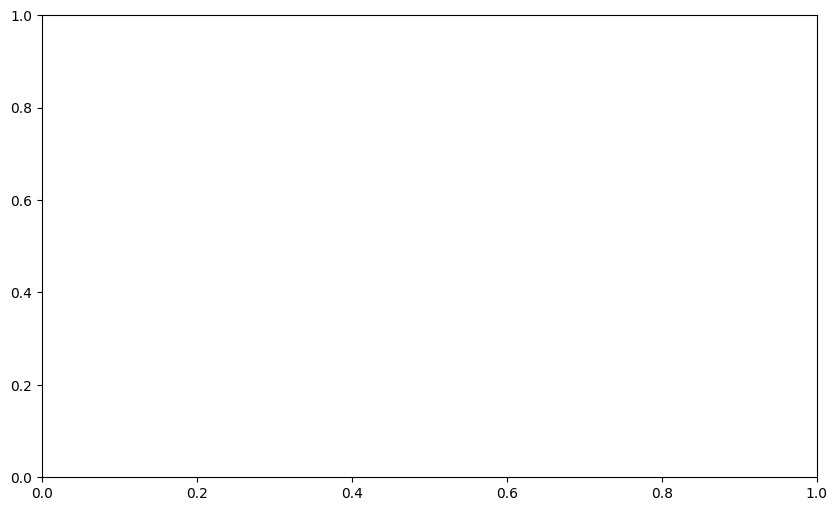

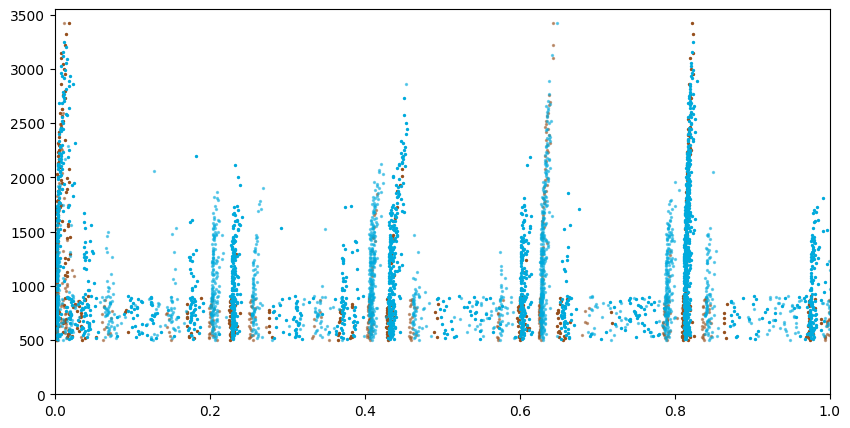

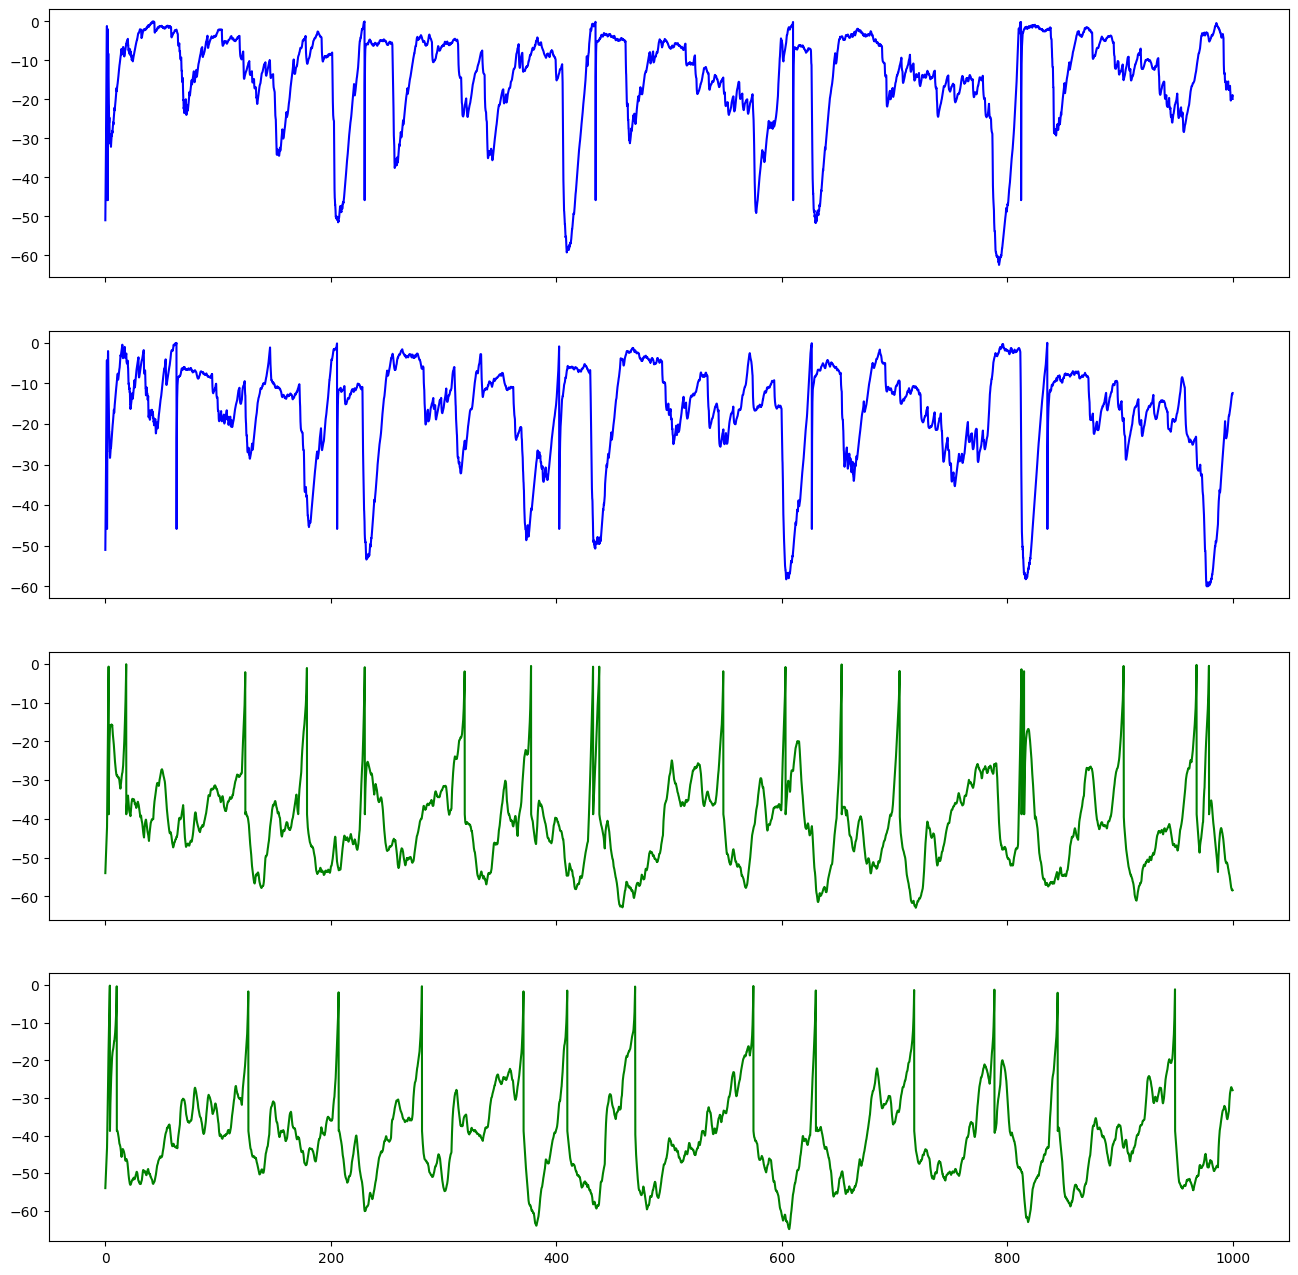

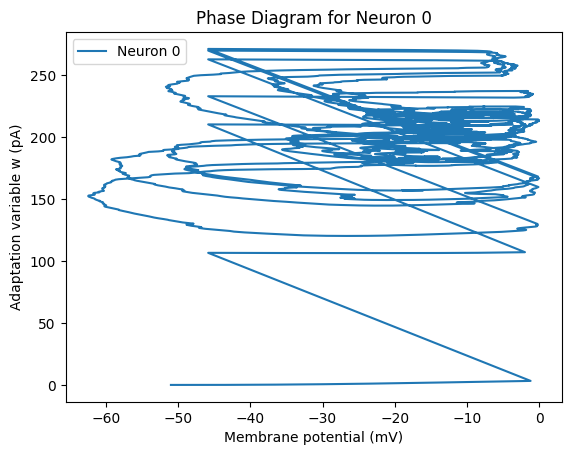

In [137]:
update_plot(0.8, 0.6, 0.8, 0.4)

In [96]:
slider1 = widgets.FloatSlider(
    value=0.11,
    min=0,
    max=1,
    step=0.01,
    description='w_din_cin:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

slider2 = widgets.FloatSlider(
    value=0.11,
    min=0,
    max=1,
    step=0.01,
    description='w_din_din:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

slider3 = widgets.FloatSlider(
    value=0.15,
    min=0,
    max=1,
    step=0.01,
    description='w_cin_cin:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

slider4 = widgets.FloatSlider(
    value=0.15,
    min=0,
    max=1,
    step=0.01,
    description='w_cin_din:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_plot, w_d_c=slider1, w_d_d=slider2, w_c_c=slider3, w_c_d=slider4)

interactive(children=(FloatSlider(value=0.11, continuous_update=False, description='w_din_cin:', max=1.0, read…

<function __main__.update_plot(w_d_c, w_d_d, w_c_c, w_c_d)>

In [4]:
# Excitatory Mexican hat connectivity function in 2D
def excitatory_mexican_hat(x, y, sigma_exc_x, sigma_exc_y, w_exc):
    return np.exp(-x**2 / (2 * sigma_exc_x**2)) * np.exp(-y**2 / (2 * sigma_exc_y**2)) * w_exc

# Inhibitory Mexican hat connectivity function in 2D
def inhibitory_mexican_hat(x, y, sigma_inh_x, sigma_inh_y, w_inh):
    return np.exp(-x**2 / (2 * sigma_inh_x**2)) * np.exp(-y**2 / (2 * sigma_inh_y**2)) * w_inh

In [5]:
def smoothed_firing_rate(firing_times, duration, window_width):
    """
    Calculate the smoothed firing rate for a neuron over a specified duration.

    Parameters:
    - firing_times (array-like): Array of firing times for the neuron.
    - duration (float): Duration of the recording in seconds.
    - window_width (float): Width of the smoothing window in seconds.

    Returns:
    - smoothed_rate (array): Smoothed firing rate over the duration.
    """
    num_bins = int(duration / window_width)
    spike_counts, _ = np.histogram(firing_times, bins=num_bins, range=(0, duration))
    smoothed_rate = np.convolve(spike_counts, np.ones(int(window_width * num_bins)) / (window_width * num_bins), mode='same')
    return smoothed_rate

In [6]:
def create_2d_smoothed_firing_rate(spike_array, num_neurons, duration, window_width):
    """
    Creates a 2D array of smoothed firing rates at each time step for all neurons.

    Parameters:
    - spike_times_array (array-like): Array of spike times for each neuron.
    - neuron_indices_array (array-like): Array of neuron indices corresponding to spike times.
    - num_neurons (int): Number of neurons.
    - duration (float): Duration of the recording in seconds.
    - window_width (float): Width of the smoothing window in seconds.

    Returns:
    - smoothed_firing_rates (2D array): Smoothed firing rates for all neurons at each time step.
    """

    smoothed_firing_rates = np.zeros((num_neurons, int(duration/window_width)))
    spike_indices = spike_array.i
    spike_times = spike_array.t

    for neuron_idx in range(num_neurons):    
        neuron_spike_times = spike_times[spike_indices == neuron_idx]/1000
        smoothed_rate = smooth_firing_rate(neuron_spike_times, window_width, duration)
        smoothed_firing_rates[neuron_idx] = smoothed_rate

    return smoothed_firing_rates

In [3]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def excitatory_connection_weight(exc_neuron_group, other_neuron_group, sigma_exc_x, sigma_exc_y, w_exc):
    weights = []
    for other_neuron in other_neuron_group:
        for exc_neuron in exc_neuron_group:
            x_exc, y_exc = exc_neuron.x, exc_neuron.y
            x_other, y_other = other_neuron.x, other_neuron.y
            d_x = distance(x_exc, 0, x_other, 0)  # Distance in x-direction
            d_y = distance(0, y_exc, 0, y_other)  # Distance in y-direction
            weight = excitatory_mexican_hat(d_x, d_y, sigma_exc_x, sigma_exc_y, w_exc)
            weights.append(weight)
    return weights

def inhibitory_connection_weight(inh_neuron_group, other_neuron_group, sigma_inh_x, sigma_inh_y, w_inh):
    weights = []
    for other_neuron in other_neuron_group:
        for inh_neuron in inh_neuron_group:
            x_inh, y_inh = inh_neuron.x, inh_neuron.y
            x_other, y_other = other_neuron.x, other_neuron.y
            d_x = distance(x_inh, 0, x_other, 0)  # Distance in x-direction
            d_y = distance(0, y_inh, 0, y_other)  # Distance in y-direction
            weight = inhibitory_mexican_hat(d_x, d_y, sigma_inh_x, sigma_inh_y, w_inh)
            weights.append(weight)
    return weights

# Excitatory Mexican hat connectivity function in 2D
def excitatory_mexican_hat(x, y, sigma_exc_x, sigma_exc_y, w_exc):
    return np.exp(-x**2 / (2 * sigma_exc_x**2)) * np.exp(-y**2 / (2 * sigma_exc_y**2)) * w_exc

# Inhibitory Mexican hat connectivity function in 2D
def inhibitory_mexican_hat(x, y, sigma_inh_x, sigma_inh_y, w_inh):
    return np.exp(-x**2 / (2 * sigma_inh_x**2)) * np.exp(-y**2 / (2 * sigma_inh_y**2)) * w_inh

WARNING    'i' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup_7', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup_11', but also exists in the run namespace with the value 15. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup_12', but also exists in the run namespace with the value 15. The internal variable will 

999


Text(0, 0.5, 'Voltage (mV)')

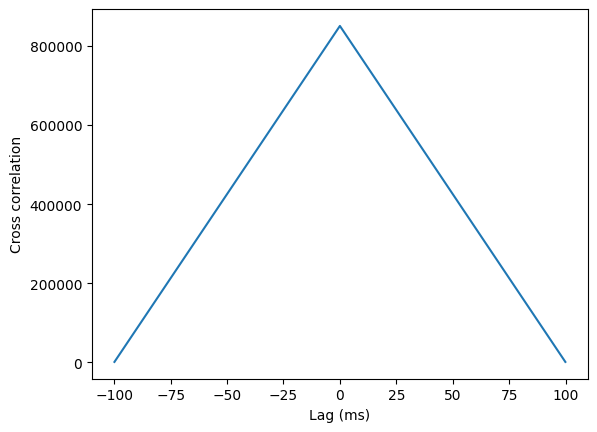

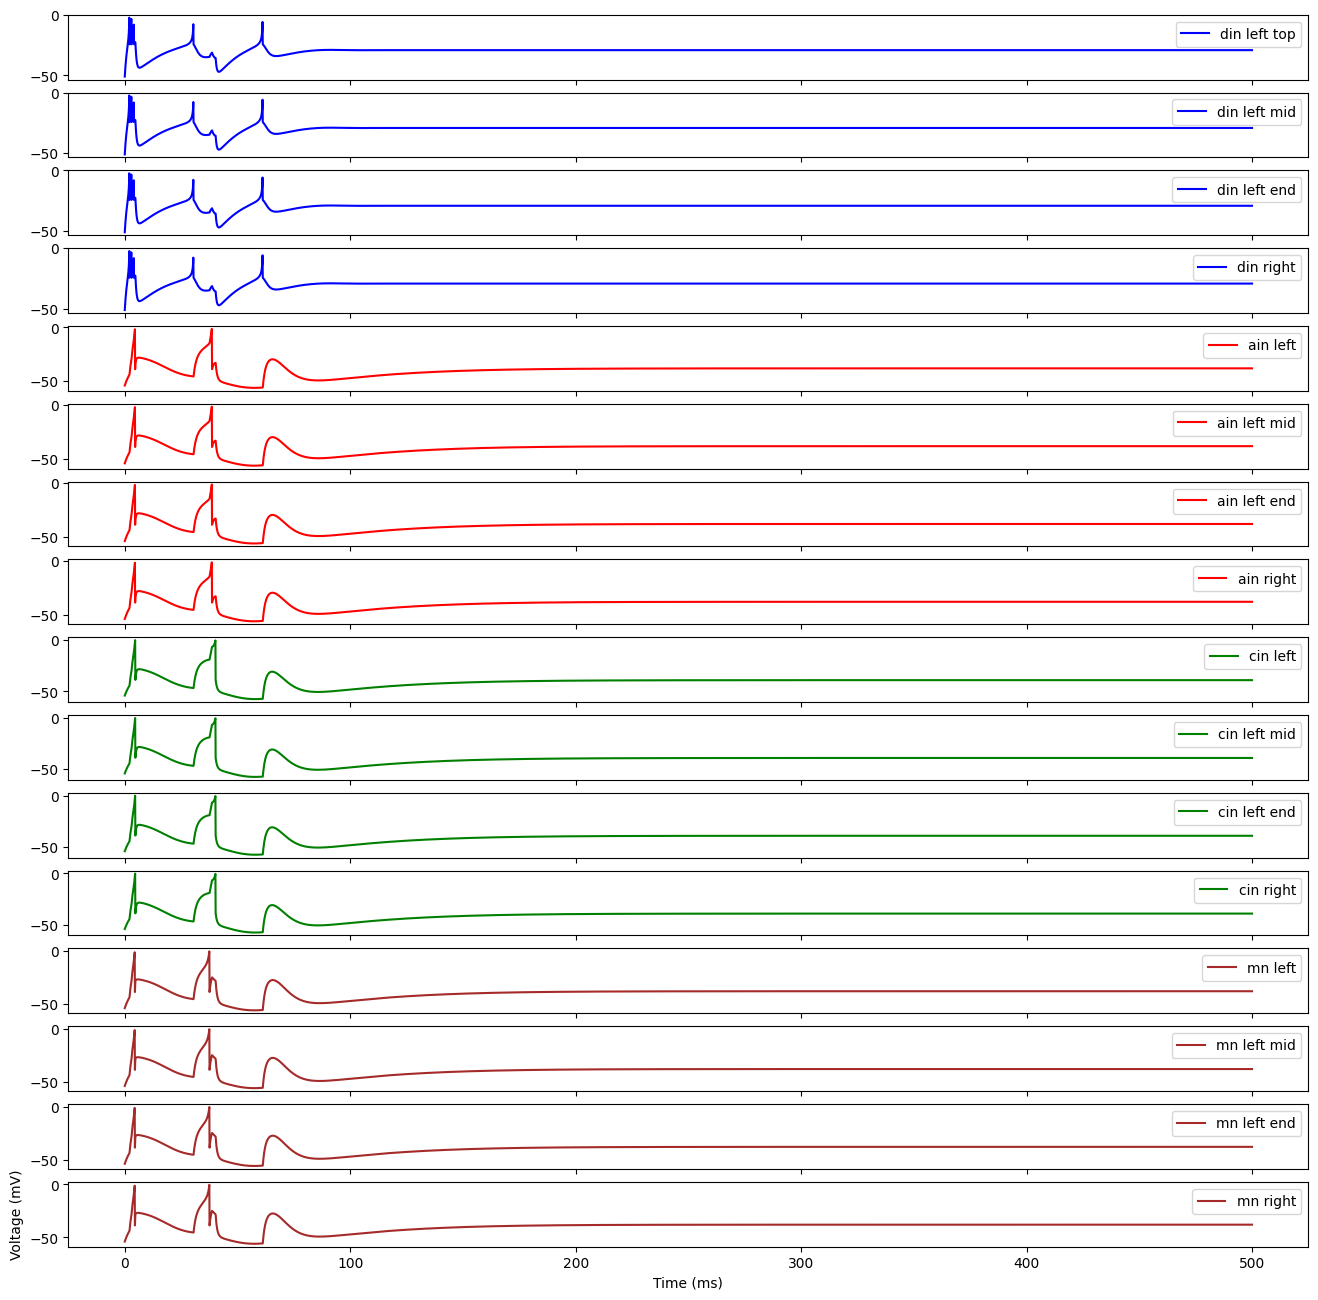

In [5]:
sigma_exc_x = 2.5  # Standard deviation for excitatory connections in x-axis
sigma_exc_y = 2.5  # Standard deviation for excitatory connections in y-axis
sigma_inh_x = 5  # Standard deviation for inhibitory connections in x-axis
sigma_inh_y = 5  # Standard deviation for inhibitory connections in y-axis

N_D = 163
N_A = 78
N_C = 271
N_M = 248

tadpole_length = 100
delay_factor = 0.1 * ms
smooth_width = 50 * ms

w_din_ain = 0.01 #10.1 
w_din_cin = 0.01 #8.2 
w_din_mn = 0.011 #9.7 
w_din_din = 0.002 #3.9
w_ain_din = 0.01 #9.0
w_ain_cin = 0.01 #9.8 
w_ain_mn = 0.01 #10.1
w_ain_ain = 0.01 #9.2
w_cin_din = 0.01 #12.4 
w_cin_ain = 0.01 #10.7 
w_cin_mn = 0.01 #9.6 
w_cin_cin = 0.01 #14.3 
w_mn_din = 0.002 #5.3 
w_mn_ain = 0.01 #10.0
w_mn_cin = 0.01 #7.7
w_mn_mn = 0.01 #4.5 

#     #### SBI PARAMS ####
din_cm = 4 * pF 
din_g_L = 3.68 * nS 
din_E_L = -51 * mV 
din_V_T = -28 * mV 
din_slope_f = 6.48 * mV 
din_a = 2.85 * nS 
din_tau_w = 15.39 * ms 
din_b = 19.92 * pA 
din_V_reset = -24.34 * mV
din_i_stim = 122.64 * pA 

ain_cm = 4 * pF
ain_g_L = 1.35 * nS
ain_E_L = -54 *mV
ain_V_T = -29 * mV
ain_slope_f = 12.8 * mV
ain_a = 0.62 * nS
ain_tau_w = 58.6 * ms
ain_b = 21.6 * pA
ain_V_reset = -38.8 * mV
ain_i_stim = 22.9 * pA 

cin_cm = 4 * pF
cin_g_L = 1.35 * nS
cin_E_L = -54 *mV
cin_V_T = -29 * mV
cin_slope_f = 12.8 * mV
cin_a = 0.62 * nS
cin_tau_w = 58.6 * ms
cin_b = 21.6 * pA
cin_V_reset = -38.8 * mV
cin_i_stim = 21.6 * pA 

mn_cm = 4 * pF
mn_g_L = 1.35 * nS
mn_E_L = -54 *mV
mn_V_T = -29 * mV
mn_slope_f = 12.8 * mV
mn_a = 0.62 * nS
mn_tau_w = 58.6 * ms
mn_b = 21.6 * pA
mn_V_reset = -38.8 * mV
mn_i_stim = 22.9 * pA 


E_ex = 0 * mV
E_in = -70 * mV

v_spike_threshold = 0 * mV

parameters = {'general': {'tau_exc':5*ms, 'tau_inh':5*ms, 'E_exc':E_ex, 'E_inh':E_in, 'v_sp':v_spike_threshold},
            'dins': {'N': N_D, 'i_stim': din_i_stim, 'b':din_b, 'a':din_a, 'tau_w':din_tau_w, 'slope_f':din_slope_f, 'vr':din_V_reset, 'c_m':din_cm, 'e_l':din_E_L, \
                    'v_t': din_V_T, 'g_l': din_g_L, 'w_din_din':w_din_din*nsiemens, 'w_din_ain':w_din_ain*nsiemens, \
                     'w_din_cin':w_din_cin*nsiemens, 'w_din_mn':w_din_mn*nsiemens, 'v_initial':din_E_L}, \
            'ains': {'N': N_A, 'i_stim': ain_i_stim, 'b':ain_b, 'a':ain_a, 'tau_w':ain_tau_w, 'slope_f':ain_slope_f, 'vr':ain_V_reset, 'c_m':ain_cm, 'e_l': ain_E_L, \
                    'v_t': ain_V_T, 'g_l': ain_g_L, 'w_ain_din':w_ain_din*nsiemens, 'w_ain_ain':w_ain_ain*nsiemens, \
                     'w_ain_cin':w_ain_cin*nsiemens, 'w_ain_mn':w_ain_mn*nsiemens, 'v_initial':ain_E_L},
            'cins': {'N': N_C, 'i_stim': cin_i_stim, 'b':cin_b, 'a':cin_a, 'tau_w':cin_tau_w, 'slope_f':cin_slope_f, 'vr':cin_V_reset, 'c_m':cin_cm, 'e_l': cin_E_L, \
                    'v_t': cin_V_T, 'g_l': cin_g_L, 'w_cin_din':w_cin_din*nsiemens, 'w_cin_ain':w_cin_ain*nsiemens, \
                     'w_cin_cin':w_cin_cin*nsiemens, 'w_cin_mn':w_cin_mn*nsiemens, 'v_initial':cin_E_L}, 
            'mns': {'N': N_M, 'i_stim': mn_i_stim, 'b':mn_b, 'a':mn_a, 'tau_w':mn_tau_w, 'slope_f':mn_slope_f, 'vr':mn_V_reset, 'c_m':mn_cm, 'e_l': mn_E_L, \
                    'v_t': mn_V_T, 'g_l': mn_g_L, 'w_mn_din':w_mn_din*nsiemens, 'w_mn_ain':w_mn_ain*nsiemens, \
                    'w_mn_cin':w_mn_cin*nsiemens, 'w_mn_mn':w_mn_mn*nsiemens, 'v_initial':mn_E_L}}
simulation_time = 0.5*second 
stimulus_duration = 100*ms
poisson_rate = 200*Hz

start_scope()

eqs = """
dv/dt = (g_l*(e_l-v) + g_l*slope_f*exp((v-v_t)/slope_f) - g_exc*(v-E_exc) - g_inh*(v-E_inh) + i_stim + i_ext - w)/c_m : volt
dw/dt = (a*(v - e_l) - w)/tau_w : amp
dg_exc/dt = -g_exc/tau_exc : siemens 
dg_inh/dt = -g_inh/tau_inh : siemens 
i_ext : amp
x : 1 (constant)
y : 1 (constant)
"""

din_params = parameters['general'].copy()
din_params.update(parameters['dins'])
ain_params = parameters['general'].copy()
ain_params.update(parameters['ains'])
cin_params = parameters['general'].copy()
cin_params.update(parameters['cins'])
mn_params = parameters['general'].copy()
mn_params.update(parameters['mns'])

N_D = parameters['dins']['N']
N_A = parameters['ains']['N']
N_C = parameters['cins']['N']
N_M = parameters['mns']['N']

# Define neuron groups
dins_left = NeuronGroup(N_D, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=din_params)
dins_right = NeuronGroup(N_D, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=din_params)
ains_left = NeuronGroup(N_A, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=ain_params)
ains_right = NeuronGroup(N_A, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=ain_params)
cins_left = NeuronGroup(N_C, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=cin_params)
cins_right = NeuronGroup(N_C, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=cin_params)
mns_left = NeuronGroup(N_M, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=mn_params)
mns_right = NeuronGroup(N_M, model=eqs, method='euler', threshold='v > 0*mV', reset='v = vr\nw = w + b', namespace=mn_params)

dins_left.v = parameters['dins']['e_l']
dins_right.v = parameters['dins']['e_l']
ains_left.v = parameters['ains']['e_l']
ains_right.v = parameters['ains']['e_l']
cins_left.v = parameters['cins']['e_l']
cins_right.v = parameters['cins']['e_l']
mns_left.v = parameters['mns']['e_l']
mns_right.v = parameters['mns']['e_l']

dins_left.w = 0
dins_right.w = 0
ains_left.w = 0
ains_right.w = 0
cins_left.w = 0
cins_right.w = 0
mns_left.w = 0
mns_right.w = 0

din_spacing = tadpole_length / N_D
ain_spacing = tadpole_length / N_A
cin_spacing = tadpole_length / N_C
mn_spacing = tadpole_length / N_M

dins_left.x = 0  # X position
dins_left.y = 'i * din_spacing'  # Y position
dins_right.x = 6  # X position
dins_right.y = 'i * din_spacing'  # Y position
ains_left.x = 1  # X position
ains_left.y = 'i * ain_spacing'  # Y position
ains_right.x = 7  # X position
ains_right.y = 'i * ain_spacing'  # Y position
cins_left.x = 2  # X position
cins_left.y = 'i * cin_spacing'  # Y position
cins_right.x = 8  # X position
cins_right.y = 'i * cin_spacing'  # Y position
mns_left.x = 3  # X position
mns_left.y = 'i * mn_spacing'  # Y position
mns_right.x = 9  # X position
mns_right.y = 'i * mn_spacing'  # Y position

din_y = np.arange(N_D) * din_spacing
din_x_l = [0] * N_D
din_x_r = [6] * N_D
ain_y = np.arange(N_A) * ain_spacing
ain_x_l = [1] * N_A
ain_x_r = [7] * N_A
cin_y = np.arange(N_C) * cin_spacing
cin_x_l = [2] * N_C
cin_x_r = [8] * N_C
mn_y = np.arange(N_M) * mn_spacing
mn_x_l = [3] * N_M
mn_x_r = [9] * N_M

# external_input_rate = 16*Hz
# external_input_neurons_left = dins_left[:16] #exc_neurons[:int(N_exc*0.1)]
# external_input_neurons_right = dins_right[:16] #inh_neurons[:int(N_inh*0.1)]
# ext_input_ains_l = ains_left[:int(N_A*0.1)]
# ext_input_ains_r = ains_right[:int(N_A*0.1)]
# ext_input_cins_l = cins_left[:int(N_C*0.1)]
# ext_input_cins_r = cins_right[:int(N_C*0.1)]
# ext_input_mns_l = mns_left[:int(N_M*0.1)]
# ext_input_mns_r = mns_right[:int(N_M*0.1)]
# external_input_top_neurons_left = PoissonInput(target=external_input_neurons_left, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# external_input_top_neurons_right = PoissonInput(target=external_input_neurons_right, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# ext_input_top_ains_left = PoissonInput(target=ext_input_ains_l, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# ext_input_top_ains_right = PoissonInput(target=ext_input_ains_r, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# ext_input_top_cins_left = PoissonInput(target=ext_input_cins_l, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# ext_input_top_cins_right = PoissonInput(target=ext_input_cins_r, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# ext_input_top_mns_left = PoissonInput(target=ext_input_mns_l, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)
# ext_input_top_mns_right = PoissonInput(target=ext_input_mns_r, target_var='i_ext', N=1, rate=external_input_rate, weight=20*pA)

#     stimulus = TimedArray([10*Hz,0*Hz,0*Hz,0*Hz,0*Hz,0*Hz,0*Hz,0*Hz,0*Hz,0*Hz], dt=50*ms)
#     P = PoissonGroup(1, rates='stimulus(t)')
#     synapse = Synapses(P, dins_left, on_pre='g_exc += 10*nsiemens')
#     synapse.connect()

#     # Define the external input spike - just want one spike at start of simulation to left dINs
#     spike_times = [0] * ms  # Spike at time 0

#     # Create the spike generator group for the external input
#     input_spike_group = SpikeGeneratorGroup(1, indices=[0], times=spike_times)

#     # Define the synaptic weight for the external input
#     w_ext = 12.5 * nsiemens  # Adjust as needed

#     # Define the synaptic connection
#     synapse = Synapses(input_spike_group, dins_left, on_pre='g_exc += w_ext')

#     # Connect the input spike to the neuron
#     synapse.connect()

synaptic_model = '''
                  w_syn : siemens
                  d : 1
                  '''

#     # Define synapses - no self connections for now

S_din_ain_l = Synapses(dins_left, ains_left, model=synaptic_model, on_pre='g_exc+=w_syn')
S_din_ain_l.connect()
#S_din_ain_l.w_syn = excitatory_connection_weight(dins_left, ains_left, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_ain'])
S_din_ain_l.w_syn = parameters['dins']['w_din_ain']
# din_ain_delays = calc_distances(din_x_l, din_y, ain_x_l, ain_y)
# S_din_ain_l.delay[:] = din_ain_delays*ms

S_din_ain_r = Synapses(dins_right, ains_right, model=synaptic_model, on_pre='g_exc+=w_syn')
S_din_ain_r.connect()
#S_din_ain_r.w_syn = excitatory_connection_weight(dins_right, ains_right, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_ain'])
S_din_ain_r.w_syn = parameters['dins']['w_din_ain']
# S_din_ain_r.delay[:] = din_ain_delays*ms

S_din_cin_l = Synapses(dins_left, cins_left, model=synaptic_model, on_pre='g_exc+=w_syn')  
S_din_cin_l.connect()
#S_din_cin_l.w_syn = excitatory_connection_weight(dins_left, cins_left, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_cin'])
S_din_cin_l.w_syn = parameters['dins']['w_din_cin']
# din_cin_delays = calc_distances(din_x_l, din_y, cin_x_l, cin_y)
# S_din_cin_l.delay[:] = din_cin_delays*ms

S_din_cin_r = Synapses(dins_right, cins_right, model=synaptic_model, on_pre='g_exc+=w_syn')  
S_din_cin_r.connect()
#S_din_cin_r.w_syn = excitatory_connection_weight(dins_right, cins_right, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_cin'])
S_din_cin_r.w_syn = parameters['dins']['w_din_cin']
# S_din_cin_r.delay[:] = din_cin_delays*ms

S_din_mn_l = Synapses(dins_left, mns_left, model=synaptic_model, on_pre='g_exc+=w_syn') 
S_din_mn_l.connect()
#S_din_mn_l.w_syn = excitatory_connection_weight(dins_left, mns_left, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_mn'])
S_din_mn_l.w_syn = parameters['dins']['w_din_mn']
# din_mn_delays = calc_distances(din_x_l, din_y, mn_x_l, mn_y)
# S_din_mn_l.delay[:] = din_mn_delays*ms

S_din_mn_r = Synapses(dins_right, mns_right, model=synaptic_model, on_pre='g_exc+=w_syn') 
S_din_mn_r.connect()
#S_din_mn_r.w_syn = excitatory_connection_weight(dins_right, mns_right, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_mn'])
S_din_mn_r.w_syn = parameters['dins']['w_din_mn']
# S_din_mn_r.delay[:] = din_mn_delays*ms

S_din_din_l = Synapses(dins_left, dins_left, model=synaptic_model, on_pre='g_exc+=w_syn') 
S_din_din_l.connect()
#S_din_din_l.w_syn = excitatory_connection_weight(dins_left, dins_left, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_din'])
S_din_din_l.w_syn = parameters['dins']['w_din_din']
# din_din_delays = calc_distances(din_x_l, din_y, din_x_l, din_y)
# S_din_din_l.delay[:] = din_din_delays*ms

S_din_din_r = Synapses(dins_right, dins_right, model=synaptic_model, on_pre='g_exc+=w_syn') 
S_din_din_r.connect()
#S_din_din_r.w_syn = excitatory_connection_weight(dins_right, dins_right, sigma_exc_x, sigma_exc_y, parameters['dins']['w_din_din'])
S_din_din_r.w_syn = parameters['dins']['w_din_din']
# S_din_din_r.delay[:] = din_din_delays*ms

S_mn_din_l = Synapses(mns_left, dins_left, model=synaptic_model, on_pre='g_exc+=w_syn')   
S_mn_din_l.connect()
#S_mn_din_l.w_syn = excitatory_connection_weight(mns_left, dins_left, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_din'])
S_mn_din_l.w_syn = parameters['mns']['w_mn_din']
# mn_din_delays = calc_distances(mn_x_l, mn_y, din_x_l, din_y)
# S_mn_din_l.delay[:] = mn_din_delays*ms

S_mn_din_r = Synapses(mns_right, dins_right, model=synaptic_model, on_pre='g_exc+=w_syn')   
S_mn_din_r.connect()
#S_mn_din_r.w_syn = excitatory_connection_weight(mns_right, dins_right, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_din'])
S_mn_din_r.w_syn = parameters['mns']['w_mn_din']
# S_mn_din_r.delay[:] = mn_din_delays*ms

S_mn_ain_l = Synapses(mns_left, ains_left, model=synaptic_model, on_pre='g_exc+=w_syn')   
S_mn_ain_l.connect()
#S_mn_ain_l.w_syn = excitatory_connection_weight(mns_left, ains_left, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_ain'])
S_mn_ain_l.w_syn = parameters['mns']['w_mn_ain']
# mn_ain_delays = calc_distances(mn_x_l, mn_y, ain_x_l, ain_y)
# S_mn_ain_l.delay[:] = mn_ain_delays*ms

S_mn_ain_r = Synapses(mns_right, ains_right, model=synaptic_model, on_pre='g_exc+=w_syn')   
S_mn_ain_r.connect()
#S_mn_ain_r.w_syn = excitatory_connection_weight(mns_right, ains_right, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_ain'])
S_mn_ain_r.w_syn = parameters['mns']['w_mn_ain']
# S_mn_ain_r.delay[:] = mn_ain_delays*ms

S_mn_cin_l = Synapses(mns_left, cins_left, model=synaptic_model, on_pre='g_exc+=w_syn')  
S_mn_cin_l.connect()
#S_mn_cin_l.w_syn = excitatory_connection_weight(mns_left, cins_left, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_cin'])
S_mn_cin_l.w_syn = parameters['mns']['w_mn_cin']
# mn_cin_delays = calc_distances(mn_x_l, mn_y, cin_x_l, cin_y)
# S_mn_cin_l.delay[:] = mn_cin_delays*ms

S_mn_cin_r = Synapses(mns_right, cins_right, model=synaptic_model, on_pre='g_exc+=w_syn')  
S_mn_cin_r.connect()
#S_mn_cin_r.w_syn = excitatory_connection_weight(mns_right, cins_right, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_cin'])
S_mn_cin_r.w_syn = parameters['mns']['w_mn_cin']
# S_mn_cin_r.delay[:] = mn_cin_delays*ms

S_mn_mn_l = Synapses(mns_left, mns_left, model=synaptic_model, on_pre='g_exc+=w_syn')  
S_mn_mn_l.connect()
#S_mn_mn_l.w_syn = excitatory_connection_weight(mns_left, mns_left, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_mn'])
S_mn_mn_l.w_syn = parameters['mns']['w_mn_mn']
# mn_mn_delays = calc_distances(mn_x_l, mn_y, mn_x_l, mn_y)
# S_mn_mn_l.delay[:] = mn_mn_delays*ms

S_mn_mn_r = Synapses(mns_right, mns_right, model=synaptic_model, on_pre='g_exc+=w_syn')  
S_mn_mn_r.connect()
#S_mn_mn_r.w_syn = excitatory_connection_weight(mns_right, mns_right, sigma_exc_x, sigma_exc_y, parameters['mns']['w_mn_mn'])
S_mn_mn_r.w_syn = parameters['mns']['w_mn_mn']
# S_mn_mn_r.delay[:] = mn_mn_delays*ms

S_ain_din_l = Synapses(ains_left, dins_left, model=synaptic_model, on_pre='g_inh+=w_syn')  
S_ain_din_l.connect()
#S_ain_din_l.w_syn = inhibitory_connection_weight(ains_left, dins_left, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_din'])
S_ain_din_l.w_syn = parameters['ains']['w_ain_din']
# ain_din_delays = calc_distances(ain_x_l, ain_y, din_x_l, din_y)
# S_ain_din_l.delay[:] = ain_din_delays*ms

S_ain_din_r = Synapses(ains_right, dins_right, model=synaptic_model, on_pre='g_inh+=w_syn')  
S_ain_din_r.connect()
#S_ain_din_r.w_syn = inhibitory_connection_weight(ains_right, dins_right, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_din'])
S_ain_din_r.w_syn = parameters['ains']['w_ain_din']
# S_ain_din_r.delay[:] = ain_din_delays*ms

S_ain_cin_l = Synapses(ains_left, cins_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_ain_cin_l.connect()
#S_ain_cin_l.w_syn = inhibitory_connection_weight(ains_left, cins_left, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_cin'])
S_ain_cin_l.w_syn = parameters['ains']['w_ain_cin']
# ain_cin_delays = calc_distances(ain_x_l, ain_y, cin_x_l, cin_y)
# S_ain_cin_l.delay[:] = ain_cin_delays*ms

S_ain_cin_r = Synapses(ains_right, cins_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_ain_cin_r.connect()
#S_ain_cin_r.w_syn = inhibitory_connection_weight(ains_right, cins_right, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_cin'])
S_ain_cin_r.w_syn = parameters['ains']['w_ain_cin']
# S_ain_cin_r.delay[:] = ain_cin_delays*ms

S_ain_mn_l = Synapses(ains_left, mns_left, model=synaptic_model, on_pre='g_inh+=w_syn')  
S_ain_mn_l.connect()
#S_ain_mn_l.w_syn = inhibitory_connection_weight(ains_left, mns_left, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_mn'])
S_ain_mn_l.w_syn = parameters['ains']['w_ain_mn']
# ain_mn_delays = calc_distances(ain_x_l, ain_y, mn_x_l, mn_y)
# S_ain_mn_l.delay[:] = ain_mn_delays*ms

S_ain_mn_r = Synapses(ains_right, mns_right, model=synaptic_model, on_pre='g_inh+=w_syn')  
S_ain_mn_r.connect()
#S_ain_mn_r.w_syn = inhibitory_connection_weight(ains_right, mns_right, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_mn'])
S_ain_mn_r.w_syn = parameters['ains']['w_ain_mn']
# S_ain_mn_r.delay[:] = ain_mn_delays*ms

S_ain_ain_l = Synapses(ains_left, ains_left, model=synaptic_model, on_pre='g_inh+=w_syn')  
S_ain_ain_l.connect()
#S_ain_ain_l.w_syn = inhibitory_connection_weight(ains_left, ains_left, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_ain'])
S_ain_ain_l.w_syn = parameters['ains']['w_ain_ain']
# ain_ain_delays = calc_distances(ain_x_l, ain_y, ain_x_l, ain_y)
# S_ain_ain_l.delay[:] = ain_ain_delays*ms

S_ain_ain_r = Synapses(ains_right, ains_right, model=synaptic_model, on_pre='g_inh+=w_syn')  
S_ain_ain_r.connect()
#S_ain_ain_r.w_syn = inhibitory_connection_weight(ains_right, ains_right, sigma_inh_x, sigma_inh_y, parameters['ains']['w_ain_ain'])
S_ain_ain_r.w_syn = parameters['ains']['w_ain_ain']
# S_ain_ain_r.delay[:] = ain_ain_delays*ms

S_cin_din_lr = Synapses(cins_left, dins_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_din_lr.connect()
#S_cin_din_lr.w_syn = inhibitory_connection_weight(cins_left, dins_right, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_ain'])
S_cin_din_lr.w_syn = parameters['cins']['w_cin_din']
# cin_din_delays = calc_distances(cin_x_l, cin_y, din_x_l, din_y)
# S_cin_din_lr.delay[:] = cin_din_delays*ms

S_cin_din_rl = Synapses(cins_right, dins_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_din_rl.connect()
#S_cin_din_rl.w_syn = inhibitory_connection_weight(cins_right, dins_left, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_din'])
S_cin_din_rl.w_syn = parameters['cins']['w_cin_din']
# S_cin_din_rl.delay[:] = cin_din_delays*ms

S_cin_ain_lr = Synapses(cins_left, ains_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_ain_lr.connect()
#S_cin_ain_lr.w_syn = inhibitory_connection_weight(cins_left, ains_right, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_ain'])
S_cin_ain_lr.w_syn = parameters['cins']['w_cin_ain']
# cin_ain_delays = calc_distances(cin_x_l, cin_y, ain_x_l, ain_y)
# S_cin_ain_lr.delay[:] = cin_ain_delays*ms

S_cin_ain_rl = Synapses(cins_right, ains_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_ain_rl.connect()
#S_cin_ain_rl.w_syn = inhibitory_connection_weight(cins_right, ains_left, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_ain'])
S_cin_ain_rl.w_syn = parameters['cins']['w_cin_ain']
# S_cin_ain_rl.delay[:] = cin_ain_delays*ms

S_cin_mn_lr = Synapses(cins_left, mns_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_mn_lr.connect()
#S_cin_mn_lr.w_syn = inhibitory_connection_weight(cins_left, mns_right, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_mn'])
S_cin_mn_lr.w_syn = parameters['cins']['w_cin_mn']
# cin_mn_delays = calc_distances(cin_x_l, cin_y, mn_x_l, mn_y)
# S_cin_mn_lr.delay[:] = cin_mn_delays*ms

S_cin_mn_rl = Synapses(cins_right, mns_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_mn_rl.connect()
#S_cin_mn_rl.w_syn = inhibitory_connection_weight(cins_right, mns_left, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_mn'])
S_cin_mn_rl.w_syn = parameters['cins']['w_cin_mn']
# S_cin_mn_rl.delay[:] = cin_mn_delays*ms

S_cin_cin_lr = Synapses(cins_left, cins_right, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_cin_lr.connect()
#S_cin_cin_lr.w_syn = inhibitory_connection_weight(cins_left, cins_right, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_cin'])
S_cin_cin_lr.w_syn = parameters['cins']['w_cin_cin']
# cin_cin_delays = calc_distances(cin_x_l, cin_y, cin_x_l, cin_y)
# S_cin_cin_lr.delay[:] = cin_cin_delays*ms

S_cin_cin_rl = Synapses(cins_right, cins_left, model=synaptic_model, on_pre='g_inh+=w_syn') 
S_cin_cin_rl.connect()
#S_cin_cin_rl.w_syn = inhibitory_connection_weight(cins_right, cins_left, sigma_inh_x, sigma_inh_y, parameters['cins']['w_cin_cin'])
S_cin_cin_rl.w_syn = parameters['cins']['w_cin_cin']
# S_cin_cin_rl.delay[:] = cin_cin_delays*ms


mon_din_l = StateMonitor(dins_left, ['v', 'g_exc', 'g_inh', 'w'], record=0)  # Record the membrane potential of the first dIN
mon_din_l_mid = StateMonitor(dins_left, ['v', 'g_exc', 'g_inh', 'w'], record=int(N_D/2))
mon_din_l_end = StateMonitor(dins_left, ['v', 'g_exc', 'g_inh', 'w'], record=int(N_D-1))
mon_ain_l = StateMonitor(ains_left, ['v', 'g_exc', 'g_inh', 'w'], record=0)  # Record the membrane potential of the first aIN
mon_ain_l_mid = StateMonitor(ains_left, ['v', 'g_exc', 'g_inh', 'w'], record=int(N_A/2))
mon_ain_l_end = StateMonitor(ains_left, ['v', 'g_exc', 'g_inh', 'w'], record=int(N_A-1))
mon_cin_l = StateMonitor(cins_left, ['v', 'g_exc', 'g_inh'], record=0)
mon_cin_l_mid = StateMonitor(cins_left, ['v', 'g_exc', 'g_inh'], record=int(N_C/2))  # Record the membrane potential of the first cIN
mon_cin_l_end = StateMonitor(cins_left, ['v', 'g_exc', 'g_inh'], record=int(N_C-1))
mon_mn_l = StateMonitor(mns_left, ['v', 'g_exc', 'g_inh'], record=0)    # Record the membrane potential of the first MN
mon_mn_l_mid = StateMonitor(mns_left, ['v', 'g_exc', 'g_inh'], record=int(N_M/2)) 
mon_mn_l_end = StateMonitor(mns_left, ['v', 'g_exc', 'g_inh'], record=int(N_M-1)) 
mon_din_r = StateMonitor(dins_right, ['v', 'g_exc', 'g_inh'], record=0)  # Record the membrane potential of the first dIN
mon_ain_r = StateMonitor(ains_right, ['v', 'g_exc', 'g_inh'], record=0)  # Record the membrane potential of the first aIN
mon_cin_r = StateMonitor(cins_right, ['v', 'g_exc', 'g_inh'], record=0)  # Record the membrane potential of the first cIN
mon_mn_r = StateMonitor(mns_right, ['v', 'g_exc', 'g_inh'], record=0)    # Record the membrane potential of the first MN
# Define monitors
spike_mon_dins_l = SpikeMonitor(dins_left)
spike_mon_dins_r = SpikeMonitor(dins_right)
# spike_monitors = [SpikeMonitor(dins_left[i]) for i in range(N_D)]
# smoothed_rates = []
spike_mon_dinl = SpikeMonitor(dins_left[0])
spike_mon_dinr = SpikeMonitor(dins_right[0])
spike_mon_dinl_end = SpikeMonitor(dins_left[N_D-1])
spike_mon_ainl = SpikeMonitor(ains_left[0])
spike_mon_cinl = SpikeMonitor(cins_left[0])
spike_mon_mnl = SpikeMonitor(mns_left[0])

defaultclock.dt = 0.1 * ms
time_secs = simulation_time
run(time_secs)

#     plt.scatter([0]*N_D, din_y, color='blue', label='left dins')
#     plt.scatter([6]*N_D, din_y, color='blue', label='right dins')
#     plt.scatter([1]*N_A, ain_y, color='red', label='left ains')
#     plt.scatter([7]*N_A, ain_y, color='red', label='right ains')
#     plt.scatter([2]*N_C, cin_y, color='green', label='left cins')
#     plt.scatter([8]*N_C, cin_y, color='green', label='right cins')
#     plt.scatter([3]*N_M, mn_y, color='pink', label='left mns')
#     plt.scatter([9]*N_M, mn_y, color='pink', label='right mns')
#     plt.legend()
#     plt.title('Uniform distribution of neurons')
#     plt.show()


# spike_times_din1 = spike_mon_dinl.t/ms
# spike_times_mnl = spike_mon_mnl.t/ms
# spikes_din1 = np.zeros(int(time_secs*10000))
# spike_idxs = spike_times_din1*10
# for i in spike_idxs:
#     spikes_din1[int(i)] += 1
# spikes_mnl = np.zeros(int(time_secs*10000))
# spike_idxs2 = spike_times_mnl*10
# for i in spike_idxs2:
#     spikes_mnl[int(i)] += 1
# ccs = np.correlate(spikes_din1[1000:2000], spikes_mnl[1000:2000], mode='full')
# plt.plot(np.arange(-99.9, 100, 0.1), ccs)
# plt.xlabel('Lag (ms)')
# plt.ylabel('Cross correlation')
# print(np.argmax(ccs))

ccs = scipy.signal.correlate((mon_din_l.v[0]/mV)[3000:4000], (mon_din_l_end.v[0]/mV)[3000:4000], mode='full')
plt.plot(np.arange(-99.9, 100, 0.1), ccs)
plt.xlabel('Lag (ms)')
plt.ylabel('Cross correlation')
print(np.argmax(ccs))

fig, ax = plt.subplots(nrows=16, ncols=1, figsize=(16, 16), sharex=True)
ax[0].plot(mon_din_l.t / ms, mon_din_l.v[0]/mV, label='din left top', color='blue')
#     ax[1].plot(mon_din_l.t / ms, mon_din_l.g_exc[0]/nsiemens, label='din left g exc', color='blue')
#     ax[2].plot(mon_din_l.t / ms, mon_din_l.g_inh[0]/mV, label='din left g inh', color='blue')
#     ax[3].plot(mon_din_l.t / ms, mon_din_l.w[0]/pA, label='din left w', color='blue')
#     ax[4].plot(mon_din_l.t / ms, mon_din_l.g_inh[0]/nsiemens*(mon_din_l.v[0]/mV - E_in/mV), label='negative current')
#     ax[5].plot(mon_din_l.t / ms, mon_din_l.g_exc[0]/nsiemens*(mon_din_l.v[0]/mV - E_ex/mV), label='positive current')
#     ax[6].plot(mon_din_l.t / ms, (mon_din_l.g_inh[0]/nsiemens*(mon_din_l.v[0]/mV - E_in/mV) + mon_din_l.g_exc[0]/nsiemens*(mon_din_l.v[0]/mV - E_ex/mV)))
ax[1].plot(mon_din_l_mid.t / ms, mon_din_l_mid.v[0]/mV, label='din left mid', color='blue')
ax[2].plot(mon_din_l_end.t / ms, mon_din_l_end.v[0]/mV, label='din left end', color='blue')
ax[3].plot(mon_din_r.t / ms, mon_din_r.v[0]/mV, label='din right', color='blue')
ax[4].plot(mon_ain_l.t / ms, mon_ain_l.v[0]/mV, label='ain left', color='red')
ax[5].plot(mon_ain_l_mid.t / ms, mon_ain_l_mid.v[0]/mV, label='ain left mid', color='red')
ax[6].plot(mon_ain_l_end.t / ms, mon_ain_l_end.v[0]/mV, label='ain left end', color='red')
#     ax[9].plot(mon_ain_l.t / ms, mon_ain_l.w[0]/pA, label='ain left w', color='red')
ax[7].plot(mon_ain_r.t / ms, mon_ain_r.v[0]/mV, label='ain right', color='red')
ax[8].plot(mon_cin_l.t / ms, mon_cin_l.v[0]/mV, label='cin left', color='green')
ax[9].plot(mon_cin_l_mid.t / ms, mon_cin_l_mid.v[0]/mV, label='cin left mid', color='green')
ax[10].plot(mon_cin_l_end.t / ms, mon_cin_l_end.v[0]/mV, label='cin left end', color='green')
ax[11].plot(mon_cin_r.t / ms, mon_cin_r.v[0]/mV, label='cin right', color='green')
ax[12].plot(mon_mn_l.t / ms, mon_mn_l.v[0]/mV, label='mn left', color='brown')
ax[13].plot(mon_mn_l_mid.t / ms, mon_mn_l_mid.v[0]/mV, label='mn left mid', color='brown')
ax[14].plot(mon_mn_l_end.t / ms, mon_mn_l_end.v[0]/mV, label='mn left end', color='brown')
ax[15].plot(mon_mn_r.t / ms, mon_mn_r.v[0]/mV, label='mn right', color='brown')

for i in range(16):
    ax[i].legend()
    
# ax[0].legend()
# ax[4].legend()
# ax[6].legend()
# ax[8].legend()

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

# Smooth the firing rates for each individual neuron

# smoothed_firing_rates = create_2d_smoothed_firing_rate(spike_mon_dins_l, N_D, 1, 0.05)
# smoothed_firing_rates_dins_r = create_2d_smoothed_firing_rate(spike_mon_dins_r, N_D, 1, 0.05)
# din_firing_rates = np.concatenate((smoothed_firing_rates, smoothed_firing_rates_dins_r), axis=1)
# # Plotting
# plt.figure(figsize=(10, 6))
# plt.imshow(din_firing_rates, cmap='hot', aspect='auto', origin='lower', interpolation='nearest')
# plt.colorbar(label='Firing Rate (Hz)')
# plt.xlabel('Time Step')
# plt.ylabel('Neuron Index')
# plt.title('Smoothed Firing Rates (Spatiotemporal Plot)')
# plt.show()


# smooth_rates = smooth_firing_rate(spike_mon_din_l.t, window_width=0.05, duration=1.0)
#smoothed_rates.append(smooth_rates)


In [25]:
def cross_cor(v1,v2):
    # Calculate the cross-correlation
    cross_corr = np.correlate(v1, v2, mode='full')

#     Optionally, you can normalize the cross-correlation
#     This will make it easier to compare cross-correlations from signals of different lengths
    cross_corr /= np.max(cross_corr)
    
    # Find the index of the peak of the cross-correlation
    peak_index = np.argmax(cross_corr)

    # Calculate the time lag corresponding to the peak index
    time_lag = (peak_index - len(v1) + 1) / fs  # Time lag in seconds

    # Calculate the phase shift (assuming signals have the same frequency)
    phase_shift = (time_lag / len(v1)) * 2 * np.pi  # Phase shift in radians

    return phase_shift


In [129]:
sorted_idxs = np.argsort(ccs)[::-1]
max_5_idxs = sorted_idxs[:5]
max_5_idxs

array([ 915, 1998,  669,  657,  658])

In [130]:
x[915]

-8.400000000005207

In [125]:
ccs[896]

1.0

In [116]:
spike_mon_dinl.t

<spikemonitor_9.t: array([  2. ,   2.9,   4. ,  30.4,  87.4, 147.1, 206.3, 265.6, 324.9,
       383.9, 443.1]) * msecond>

In [118]:
spike_mon_mnl.t

<spikemonitor_1.t: array([  4.5,  39.3,  99.2, 157.7, 216.7, 275.9, 335.1, 394.2, 453.3]) * msecond>

In [160]:
spike_times_din1 = [x for x in spike_mon_mnl.t if x >= 100*ms]
len(spike_times_din1)/0.4

15.0

In [120]:
spike_times_mnl = [x for x in spike_mon_cinr.t if x >= 100*ms and x < 200*ms]
spike_times_mnl

[117.6 * msecond, 176.5 * msecond]

In [100]:
isi = 176.5-117.6
isi

58.900000000000006

In [131]:
phase_dinlr = 8.4/58.9
phase_dinlr

0.14261460101867574

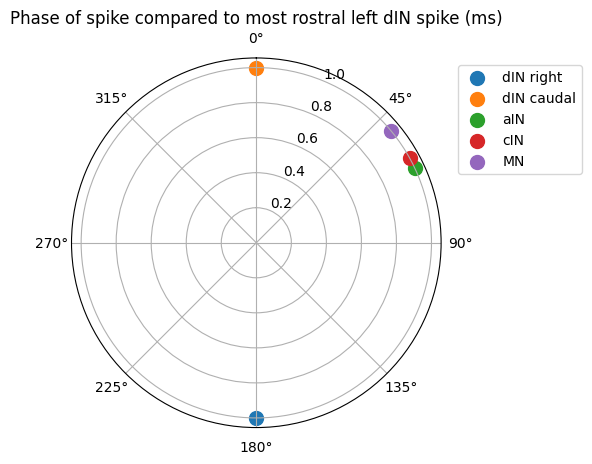

In [205]:
phases = [0.5,0,0.18,0.17,0.14]
labels = ['dIN right', 'dIN caudal', 'aIN', 'cIN', 'MN']
phases_radians = [phase * 2 * np.pi for phase in phases]


# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

for i, phase_rad in enumerate(phases_radians):
    # ax.hist(phases_radians, bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
    dot_color = plt.cm.tab10(i % 10)
    ax.scatter(phase_rad, 1, s=100, color=dot_color, label=labels[i])
    # Set the direction of 0 degrees to be at the top (12 o'clock position)
ax.set_theta_zero_location('N')

# Set the clockwise direction for increasing angles
ax.set_theta_direction(-1)

# Set the title
ax.set_title('Phase of spike compared to most rostral left dIN spike (ms)')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
# plt.show()
# x_axis = ['din_r','din_end','ain_l','cin_l','mn_l']
# plt.scatter(x_axis, phases)
# plt.ylabel('Phase of spike compared to 1st left dIN spike (ms)')

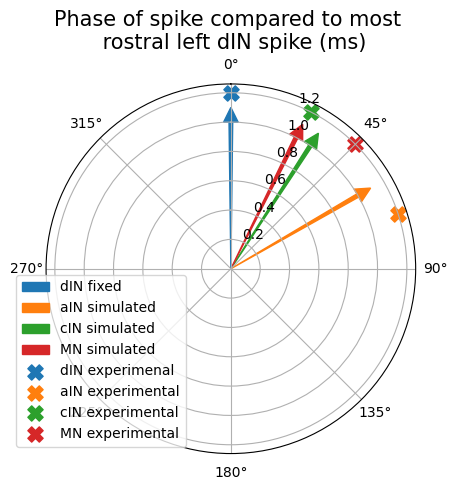

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# phases = [0.5,0,0.18,0.17,0.14]
phases = [0, 29.341692789968665, 15.235109717868353, 9.592476489028227]
phases = [0, 0.1666666666666663, 0.0912698412698412, 0.07341269841269822]
labels = ['dIN fixed', 'aIN simulated', 'cIN simulated', 'MN simulated']
phases_radians = [phase * 2 * np.pi for phase in phases]
phases_degrees = [phase * 360 for phase in phases]
num_bins = len(phases)

# Calculate the bin widths
bin_width = 2 * np.pi / 100  # 100 bins

# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# # Plot each bar individually with different colors
# for i, phase_rad in enumerate(phases_radians):
#     bar_color = plt.cm.tab10(i % 10)  # Use tab10 colormap for more distinct colors
#     bar_start = phase_rad #- (bin_width / 2)
#     bar_end = phase_rad + (bin_width / 2)
#     ax.arrow([bar_start], [1], width=bin_width, color=bar_color, label=labels[i])
    


# Plot arrows instead of bars
for i, phase_deg in enumerate(phases_degrees):
    arrow_color = plt.cm.tab10(i % 10)  # Use tab10 colormap for more distinct colors
    arrow_length = 0.5  # Example arrow length
    ax.arrow(phase_deg/180*np.pi, 0, 0, 1, width=0.025, head_width=0.1, head_length=0.1, color=arrow_color, label=labels[i])

    
# add actual phases
exp_phases = [0, 0.2, 0.075, 0.125]
labels = ['dIN experimenal', 'aIN experimental', 'cIN experimental', 'MN experimental']
phases_radians_exp = [phase * 2 * np.pi for phase in exp_phases]

# Plot each bar individually with different colors
for i, phase_rad in enumerate(phases_radians_exp):
    dot_color = plt.cm.tab10(i % 10)
    ax.scatter(phase_rad, 1.2, s=120, marker='X', color=dot_color, label=labels[i])

# Set the direction of 0 degrees to be at the top (12 o'clock position)
ax.set_theta_zero_location('N')

# Set the clockwise direction for increasing angles
ax.set_theta_direction(-1)

# Set the title
ax.set_title('Phase of spike compared to most \n rostral left dIN spike (ms)',fontsize=15)
plt.legend(loc='lower left', bbox_to_anchor=(-0.1, 0))
plt.show()


In [238]:
phases_radians

[3.141592653589793,
 0.0,
 1.1309733552923256,
 1.0681415022205298,
 0.8796459430051422]

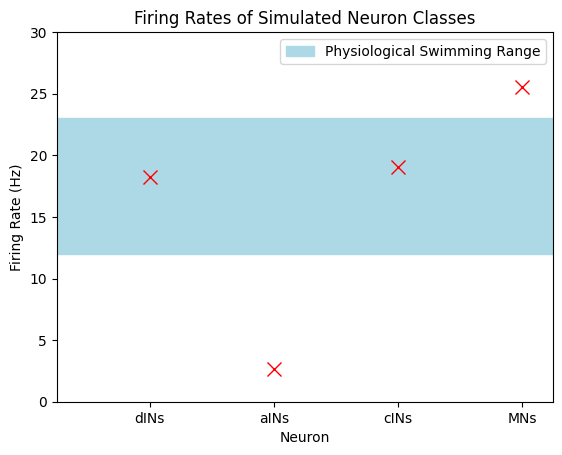

In [13]:
# Define the firing rate range for swimming
swimming_range = (12, 23)

neurons = ['dINs', 'aINs', 'cINs', 'MNs']

# Define your firing rate
firing_rates = [18.22085889570552, 2.6288659793814433, 19.077490774907748, 25.56451612903226]

# Define the number of neurons
num_neurons = 4

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the firing rate range for swimming
ax.fill_between([-0.5, 3.5], swimming_range[0], swimming_range[1], color='lightblue', label='Physiological Swimming Range')

# Plot your firing rate for each neuron
for i in range(num_neurons):
    ax.plot([i+0.25], firing_rates[i], marker='x', color='red', markersize=10)


# Set labels and title
ax.set_xlabel('Neuron')

ax.set_xticks([0.25, 1.25, 2.25, 3.25])
ax.set_xticklabels(neurons)

ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Firing Rates of Simulated Neuron Classes')
ax.set_xlim(-0.5, num_neurons-0.5)
ax.set_ylim(0, 30)

# Add legend
ax.legend()

# Show the plot
plt.show()

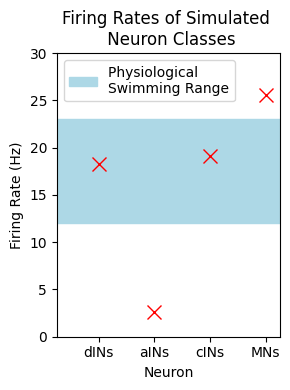

In [14]:
import matplotlib.pyplot as plt

# Define the firing rate range for swimming
swimming_range = (12, 23)

neurons = ['dINs', 'aINs', 'cINs', 'MNs']

# Define your firing rate
firing_rates = [18.22085889570552, 2.6288659793814433, 19.077490774907748, 25.56451612903226]

# Define the number of neurons
num_neurons = 4

# Create a figure and axis object with half the width
fig, ax = plt.subplots(figsize=(3, 4))  # Adjust the width (6 inches) to half of your desired width

# Plot the firing rate range for swimming
ax.fill_between([-0.5, 3.5], swimming_range[0], swimming_range[1], color='lightblue', label='Physiological \nSwimming Range')

# Plot your firing rate for each neuron
for i in range(num_neurons):
    ax.plot([i+0.25], firing_rates[i], marker='x', color='red', markersize=10)


# Set labels and title
ax.set_xlabel('Neuron')

ax.set_xticks([0.25, 1.25, 2.25, 3.25])
ax.set_xticklabels(neurons)

ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Firing Rates of Simulated \n Neuron Classes')
ax.set_xlim(-0.5, num_neurons-0.5)
ax.set_ylim(0, 30)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [39]:
V_rest = -51  # mV
V_thresh = -28  # mV
delta_V = V_thresh - V_rest
g_l = 3.68  # nS
C_m = 4  # pF
N_synapses = 15  # Number of synapses

# Calculate total synaptic conductance needed
E_syn = 0  # mV  # Excitatory synapse reversal potential
g_syn_total = delta_V * g_l / (V_rest - E_syn)

# Calculate individual synaptic conductance
g_syn_single = g_syn_total / N_synapses

print(f'Total synaptic conductance needed: {g_syn_total} nS')
print(f'Individual synaptic conductance: {g_syn_single} nS')

Total synaptic conductance needed: -1.659607843137255 nS
Individual synaptic conductance: -0.110640522875817 nS
